# Minimal Working Examples 

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ompy as om
import logging
from itertools import product

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting a matrix and its projections

[0.5 1.5 2.5 3.5 4.5]


<IPython.core.display.Javascript object>


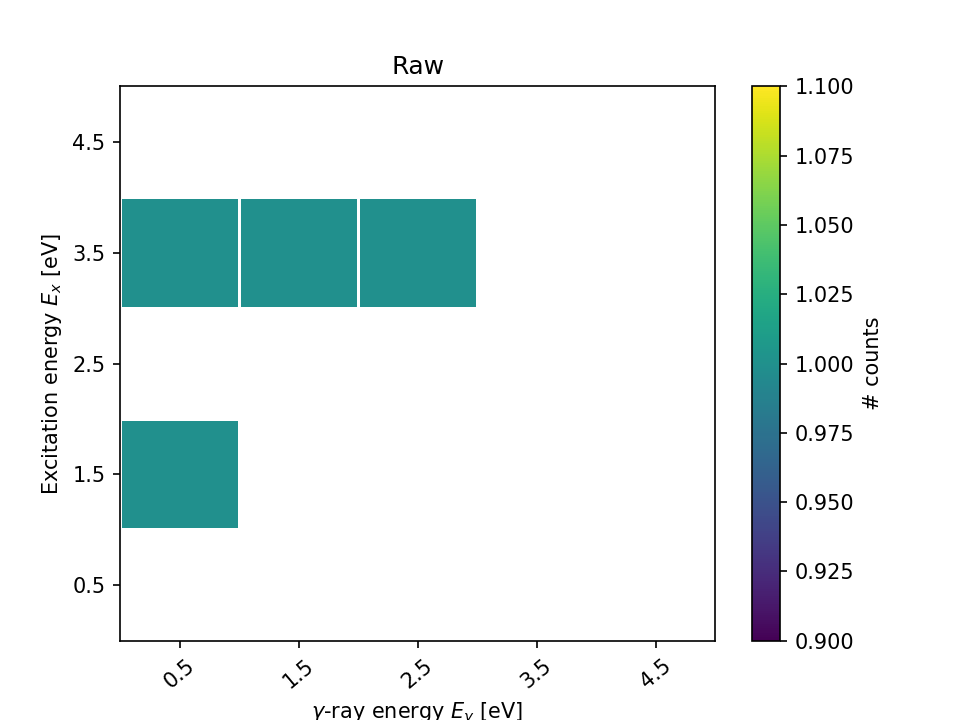

<IPython.core.display.Javascript object>


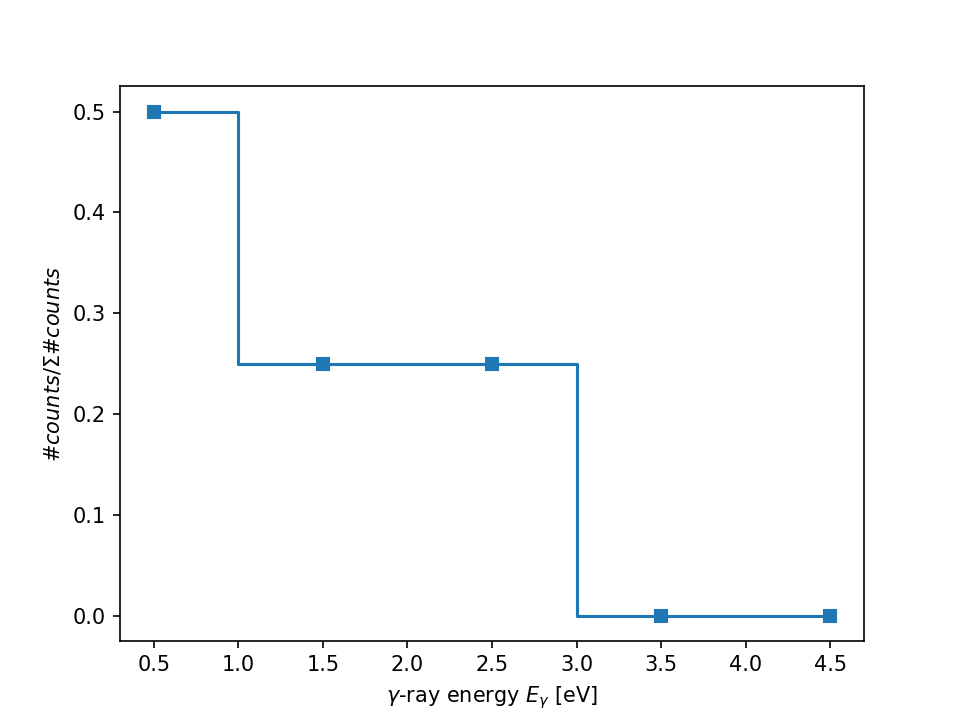

<IPython.core.display.Javascript object>


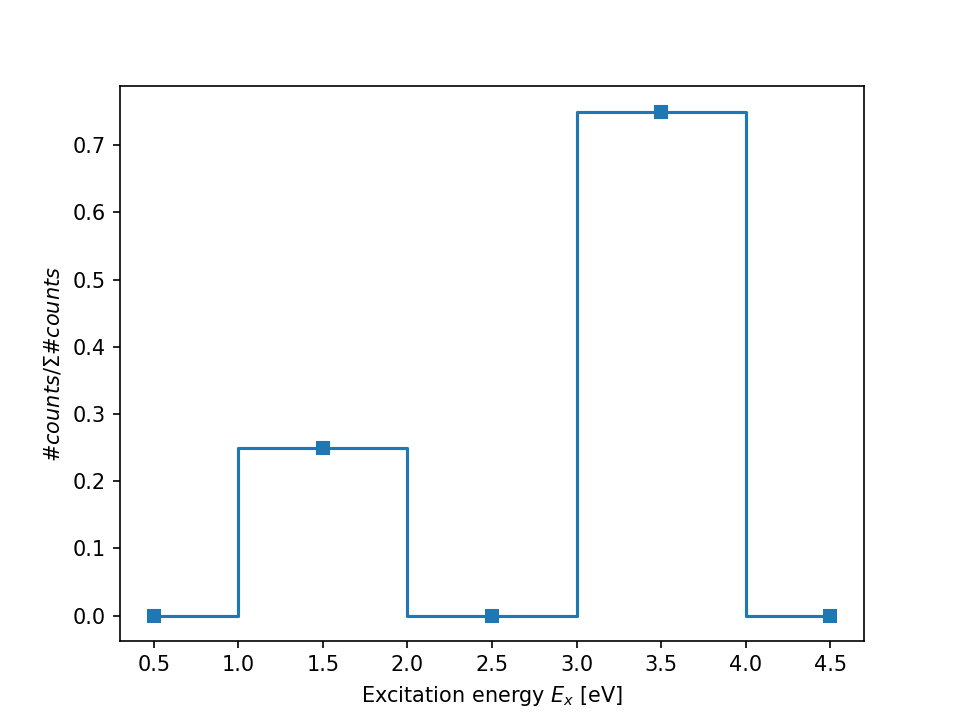

In [2]:
mat = om.disjoint_rows((5, 5))
print(mat.Ex)
mat.plot(scale='linear', edgecolor='white')
mat.plot_projection('Eg', normalize=True, marker='s')
mat.plot_projection('Ex', normalize=True, marker='s')

## Cutting a matrix

<IPython.core.display.Javascript object>


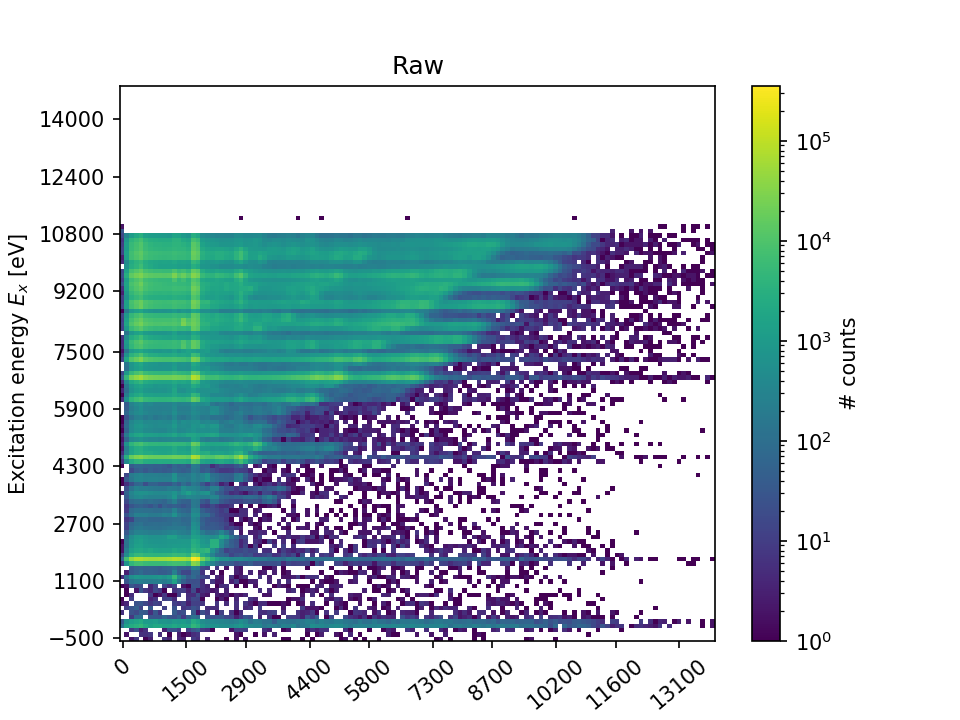

<IPython.core.display.Javascript object>


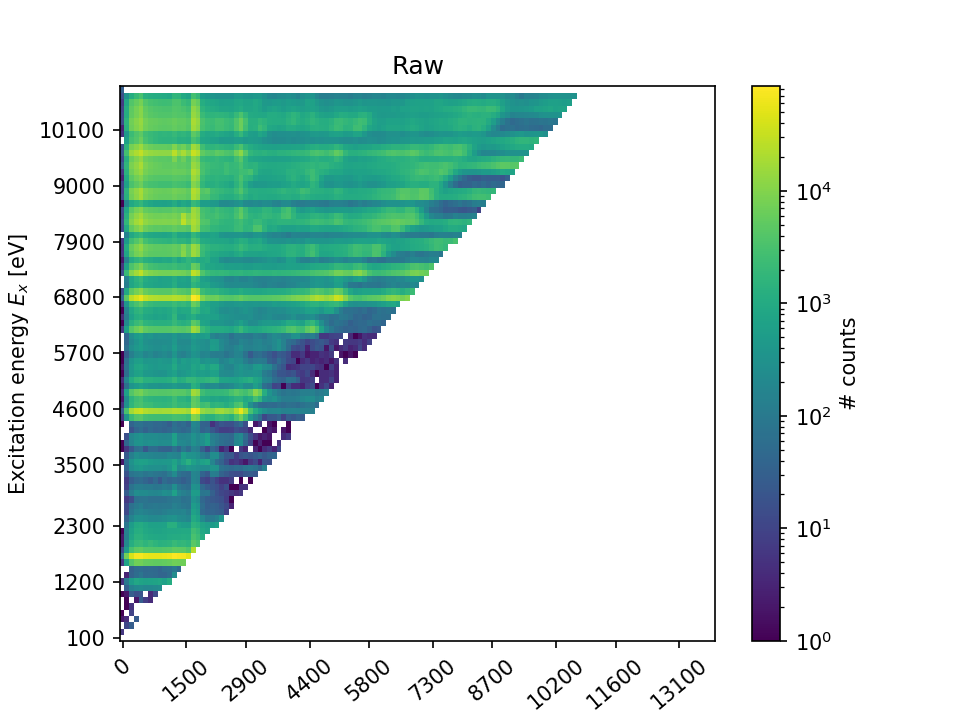

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d87d3690>)

In [5]:
simat = om.example_raw('Si28')
simat.plot()
simat.cut('Ex', Emin=0, Emax=11_000)
simba = simat.cut_diagonal(E1=[1,1], E2=[10000, 10000], inplace=False)
simba.plot()

<IPython.core.display.Javascript object>


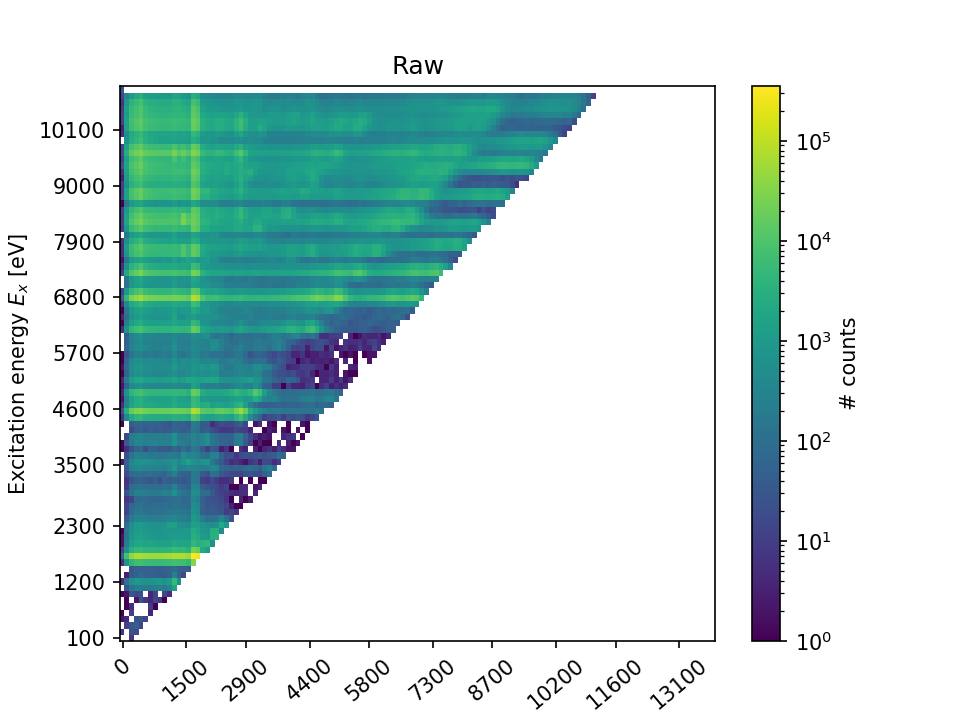

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d8166790>)

In [6]:
simat.cut_diagonal()
simat.plot()

## Apply first generation method to a mock matrix 

## Applying first generation method

INFO:ompy.firstgeneration:iter 1/5: ε = 317136
INFO:ompy.firstgeneration:iter 2/5: ε = 345050


<IPython.core.display.Javascript object>


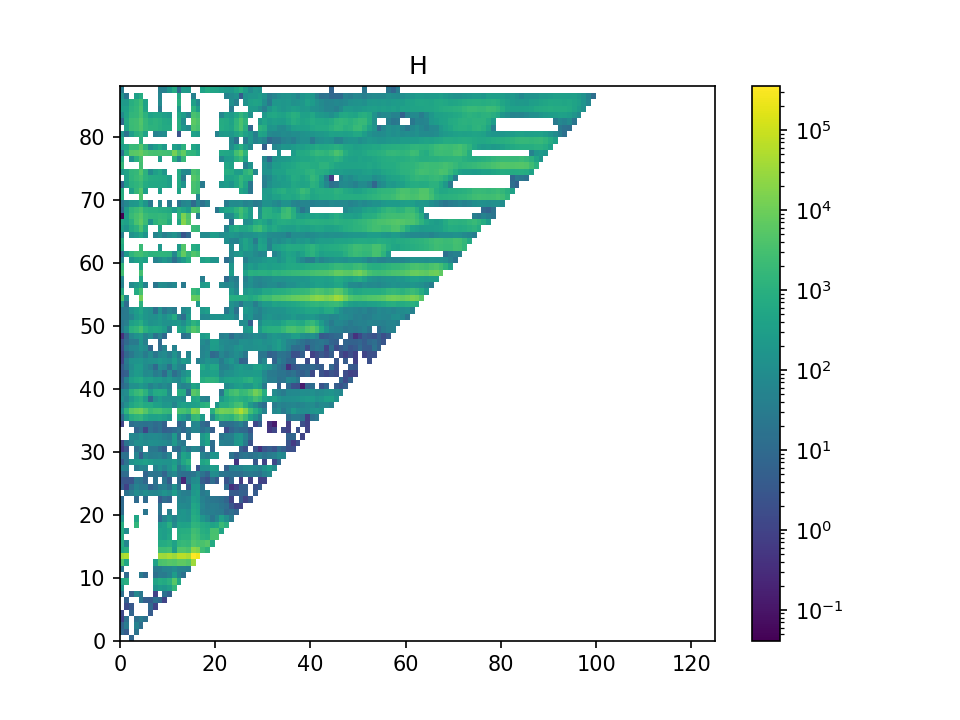

<IPython.core.display.Javascript object>


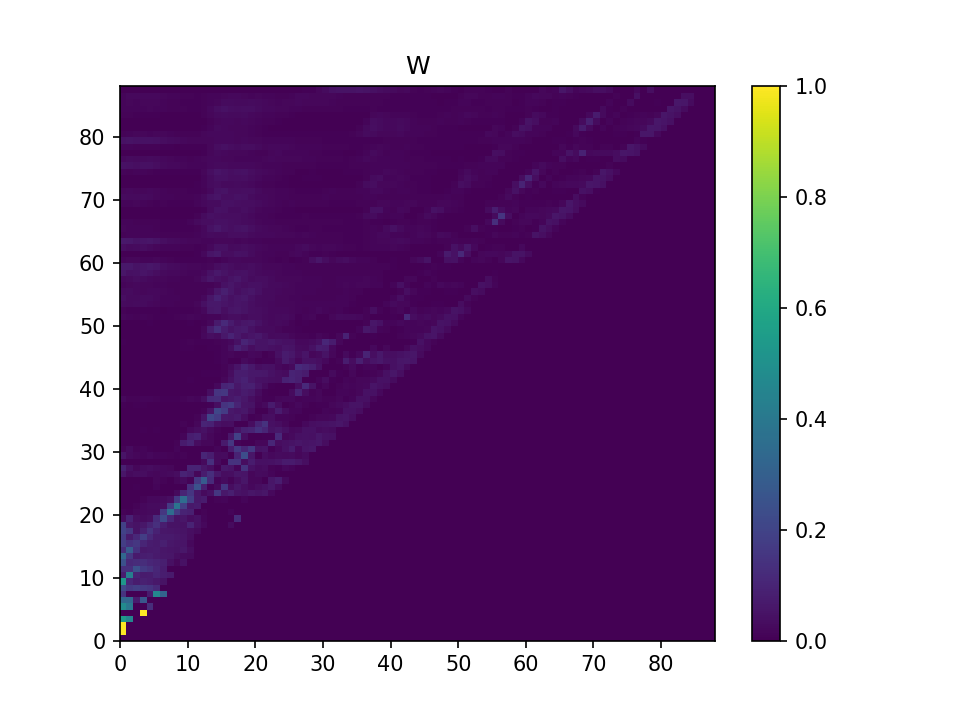

INFO:ompy.firstgeneration:iter 3/5: ε = 194464
INFO:ompy.firstgeneration:iter 4/5: ε = 100413
INFO:ompy.firstgeneration:iter 5/5: ε = 77795.8
  warnings.warn("Hello from the fill_negative() function. Please debug me.")



<IPython.core.display.Javascript object>


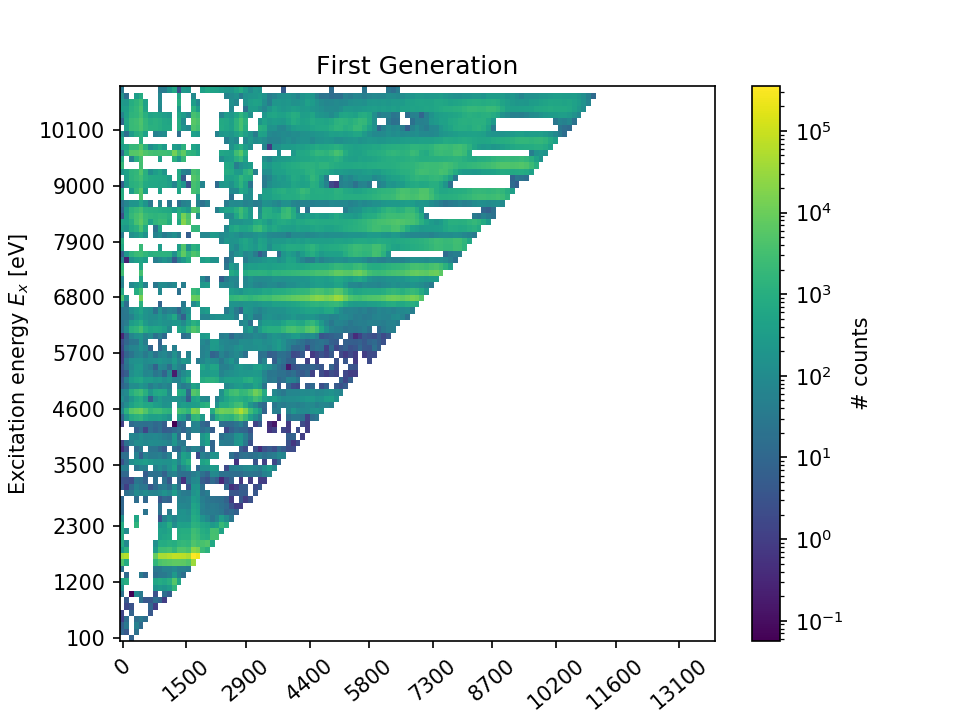

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d2612410>)

In [8]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("ompy.firstgen")
logger.setLevel(logging.DEBUG)
no_table = lambda record: '┌' in record.GetMessage()
logger.addFilter(no_table) # :(


simat = om.example_raw('Si28')
simat.cut('Ex', Emin=0, Emax=11_000)
simat.cut_diagonal()

firstgen = om.FirstGeneration()
firstgen.num_iterations = 5
firstgen.multiplicity_estimation = 'total'
firstgen.use_slide = True
firstgen.step = om.plot_hook(firstgen.step, condition = lambda i: i == 2)
mat = firstgen.apply(simat)
mat.plot()

H.shape (88, 125)
A H slice: [[0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
  0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
  0.02631579 0.02631579 0.02631579]
 [0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
  0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
  0.02564103 0.02564103 0.02564103]]
[[0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.25       0.25       0.25       ... 0.         0.         0.        ]
 [0.2        0.2        0.2        ... 0.         0.         0.        ]
 ...
 [0.01010101 0.01010101 0.01010101 ... 0.01010101 0.01010101 0.01010101]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.00980392 0.00980392 0.00980392 ... 0.00980392 0.00980392 0.00980392]]


<IPython.core.display.Javascript object>


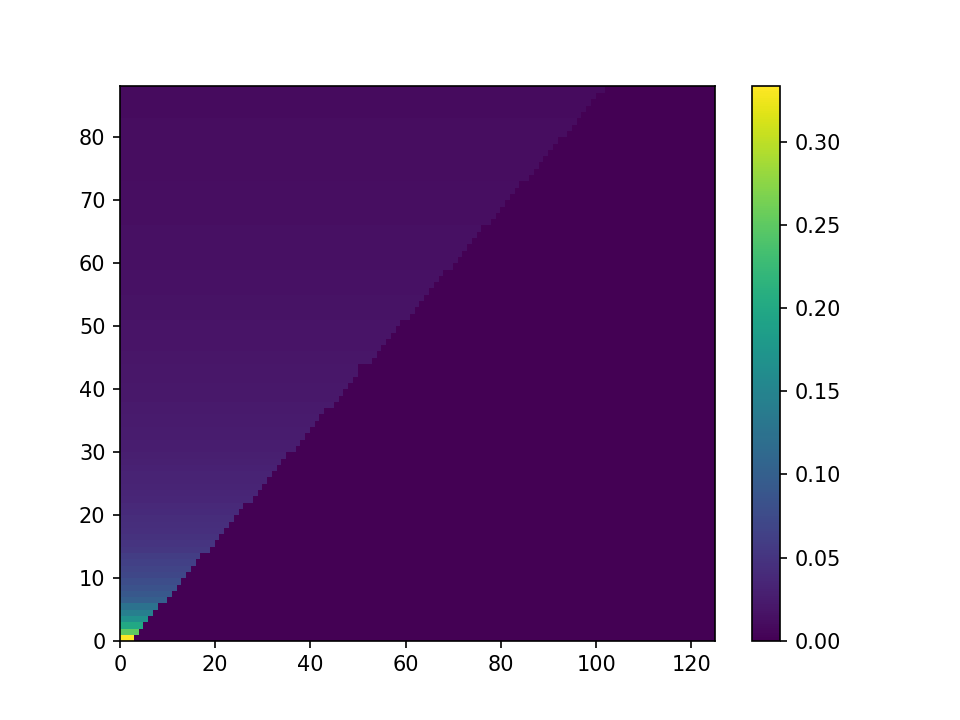

<IPython.core.display.Javascript object>


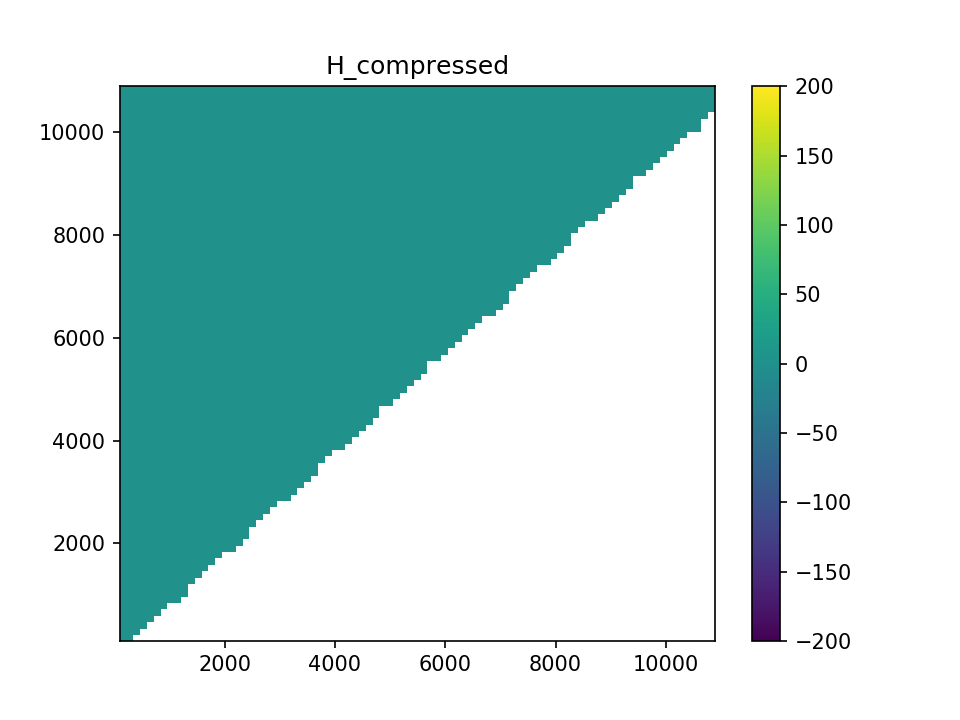

H_comp slice:  [[0.02913534 0.02913534 0.02913534 0.02913534 0.02913534 0.02913534
  0.02913534 0.02913534 0.02913534 0.02913534 0.02913534 0.02913534
  0.02913534 0.02913534 0.02913534]
 [0.02838828 0.02838828 0.02838828 0.02838828 0.02838828 0.02838828
  0.02838828 0.02838828 0.02838828 0.02838828 0.02838828 0.02838828
  0.02838828 0.02838828 0.02838828]]


<IPython.core.display.Javascript object>


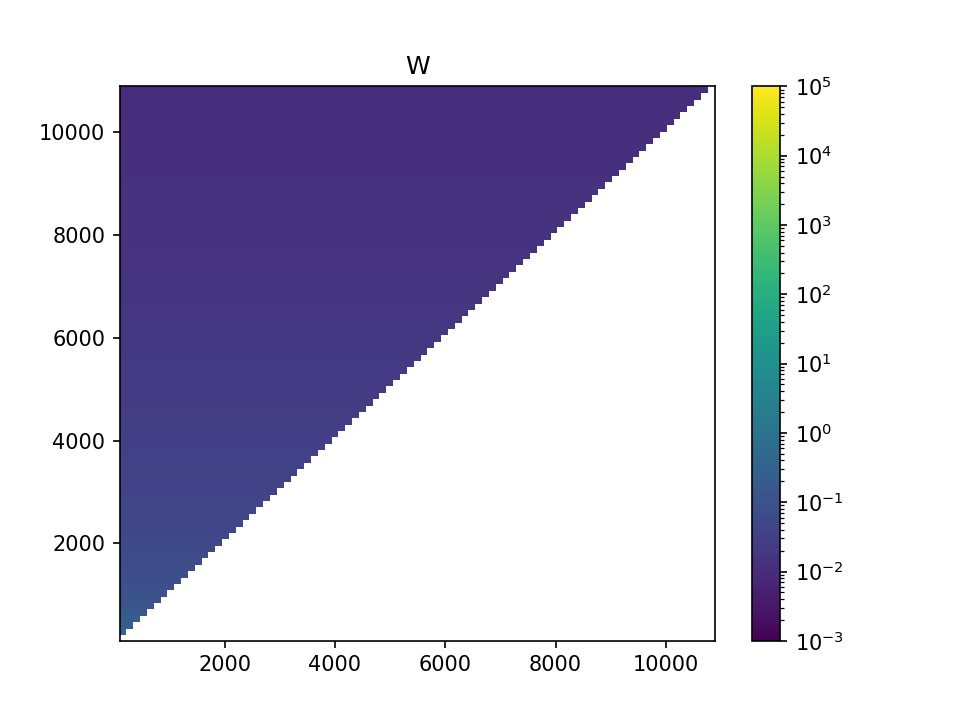

<IPython.core.display.Javascript object>


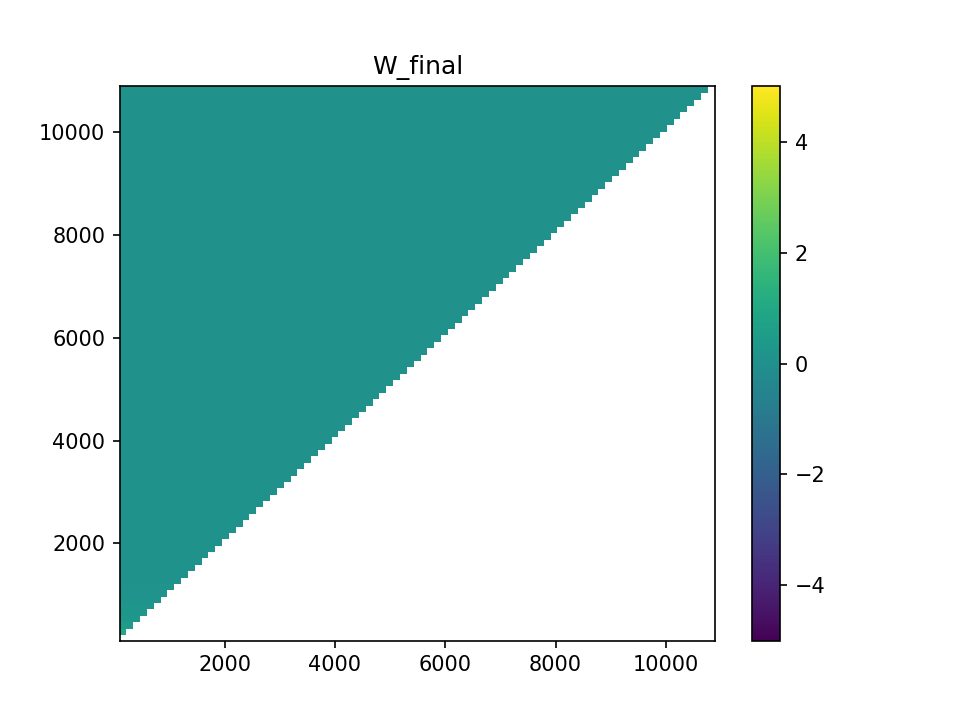

W_final slice:  [[0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806]
 [0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
  0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
  0.03125    0.03125    0.03125   ]]


<IPython.core.display.Javascript object>


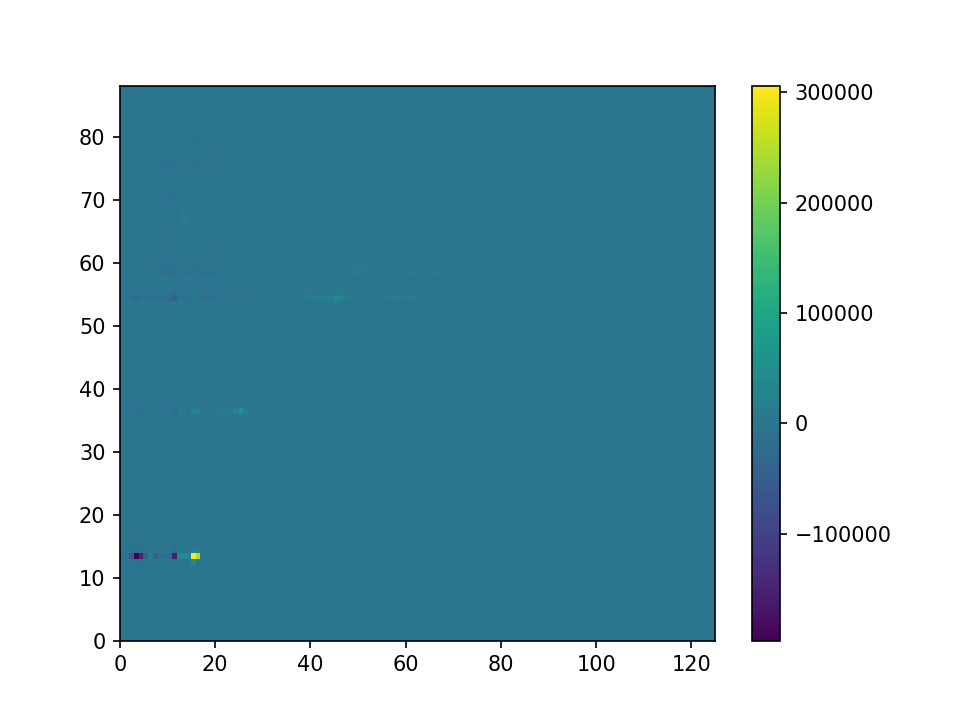

<IPython.core.display.Javascript object>


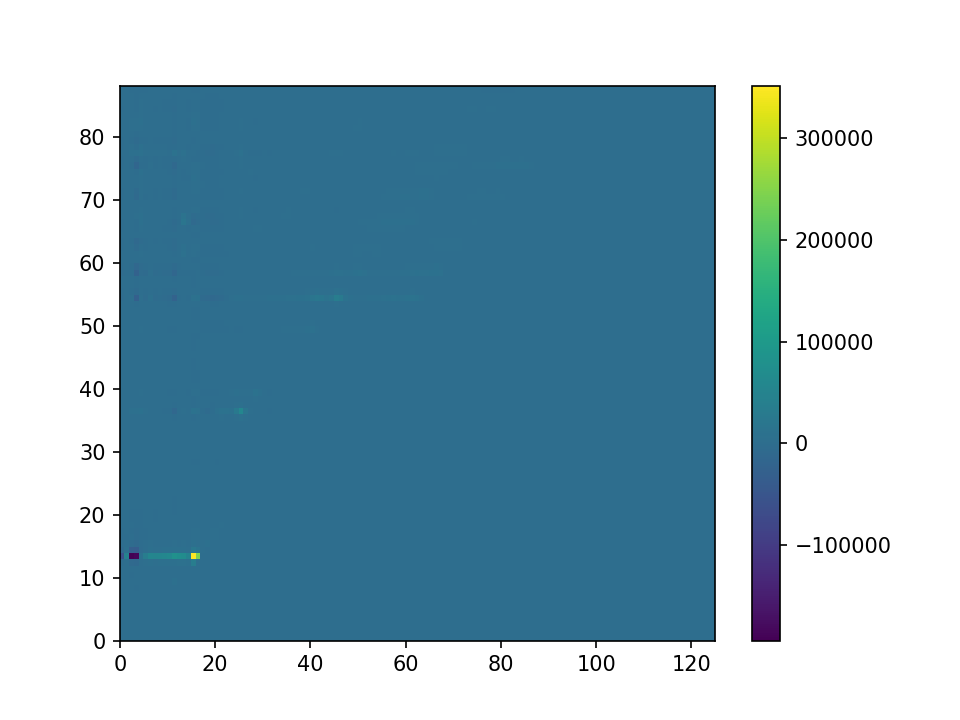

<IPython.core.display.Javascript object>


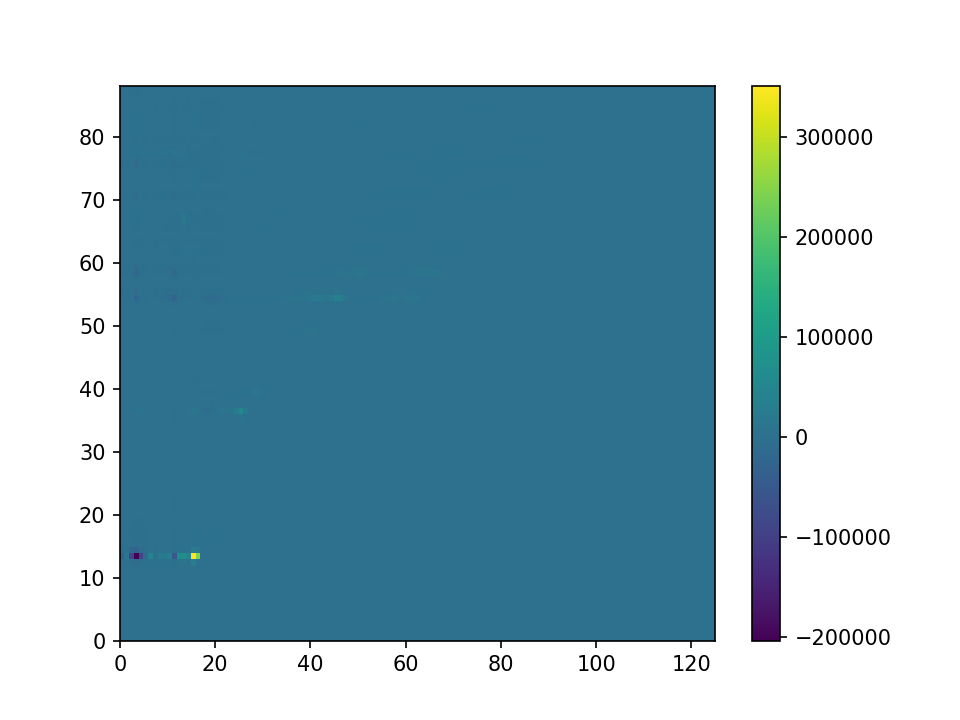

<IPython.core.display.Javascript object>


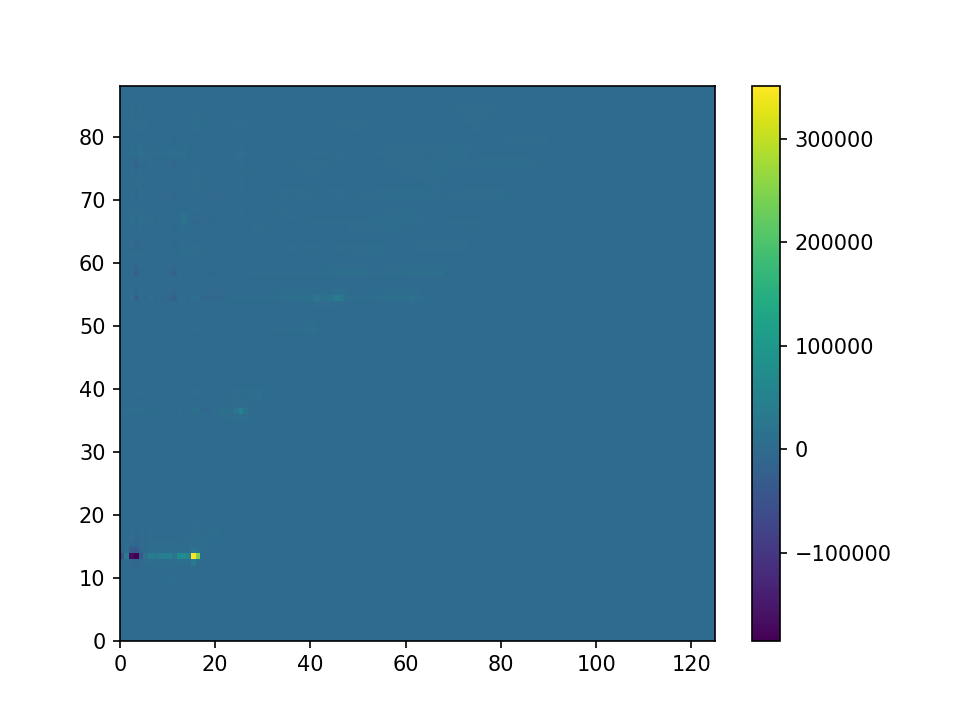

<IPython.core.display.Javascript object>


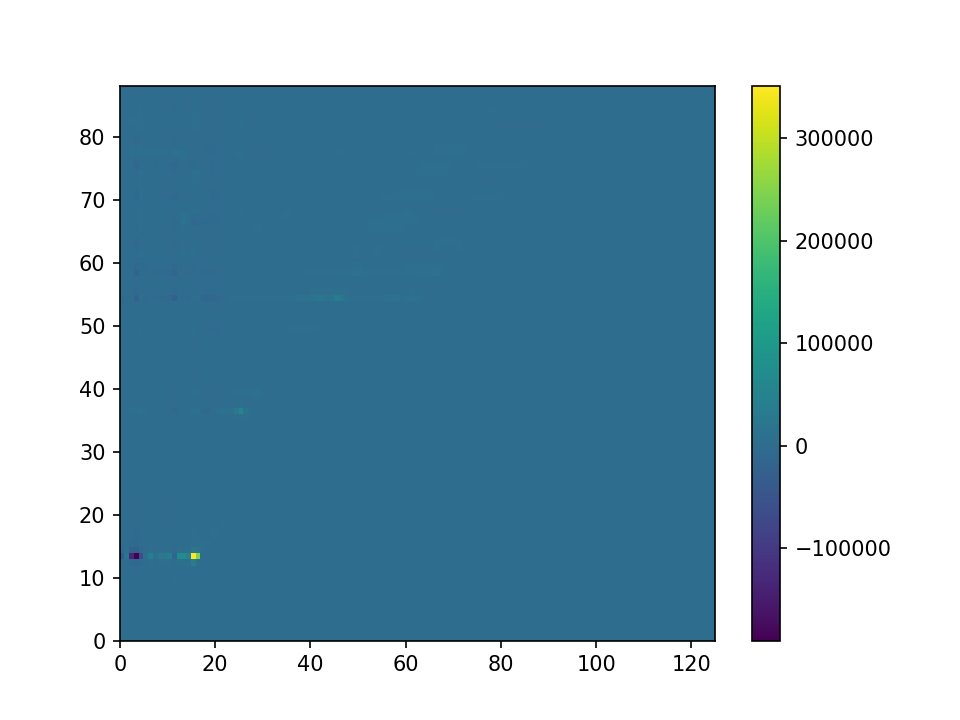

<IPython.core.display.Javascript object>


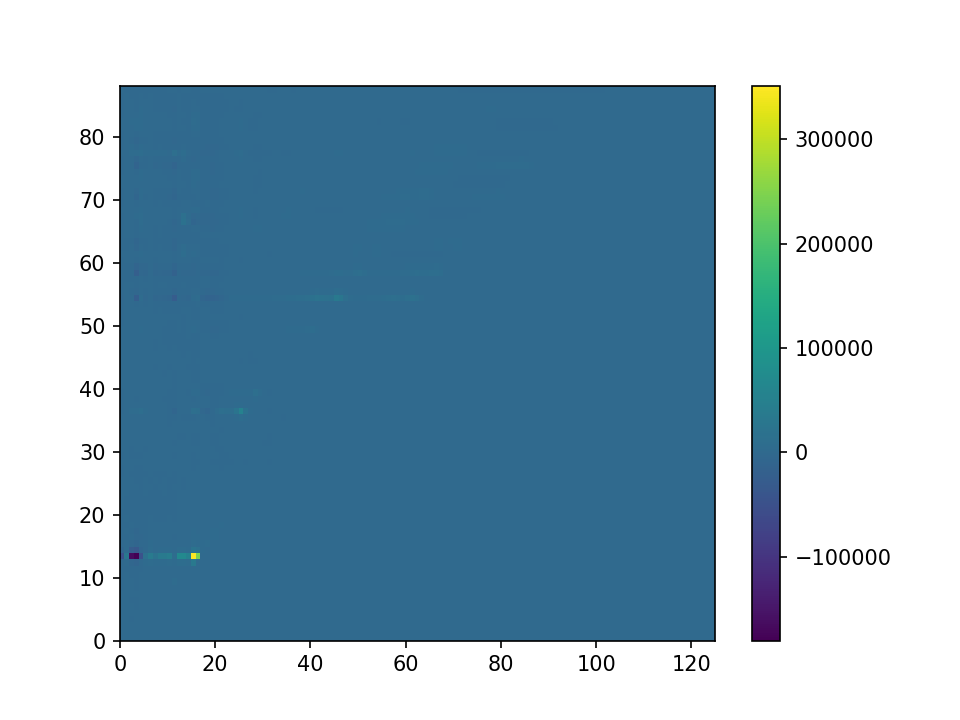

<IPython.core.display.Javascript object>


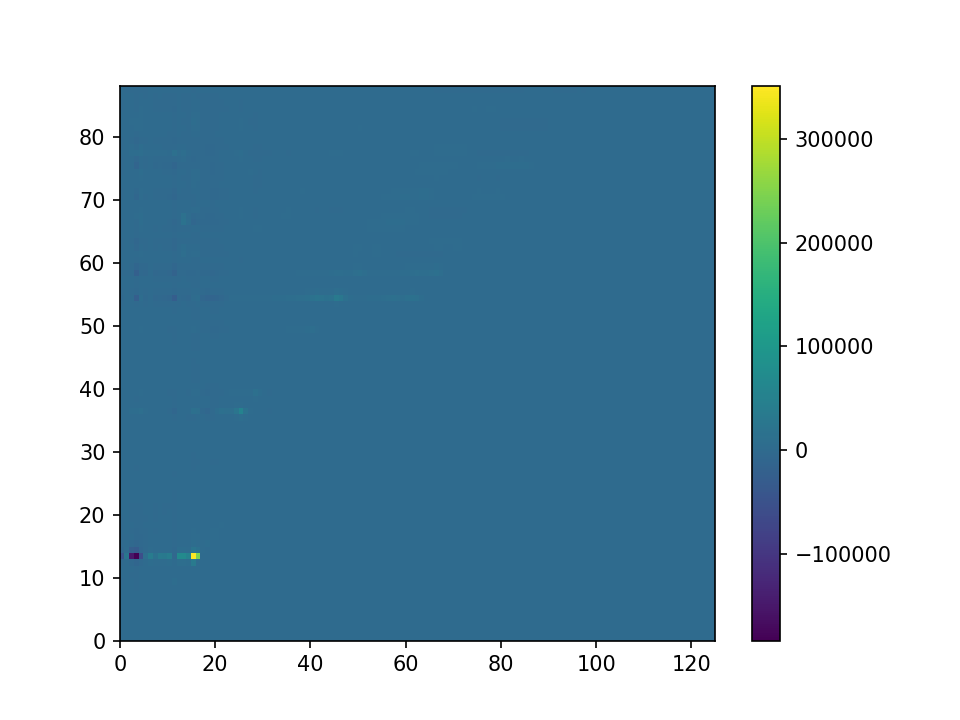

  fig, ax = plt.subplots(1)



<IPython.core.display.Javascript object>


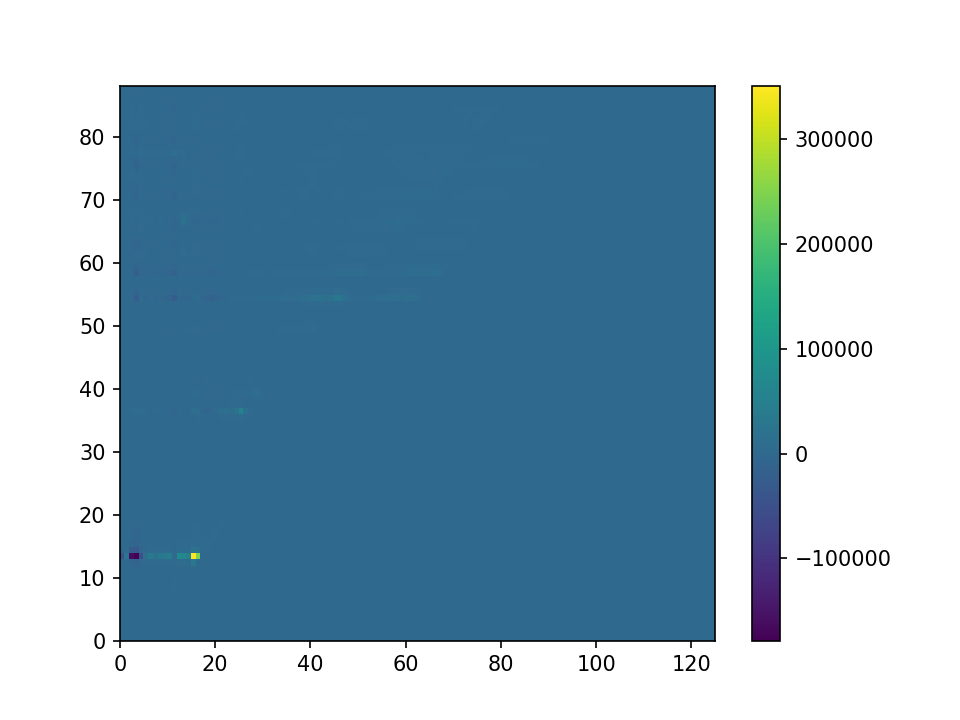

<IPython.core.display.Javascript object>


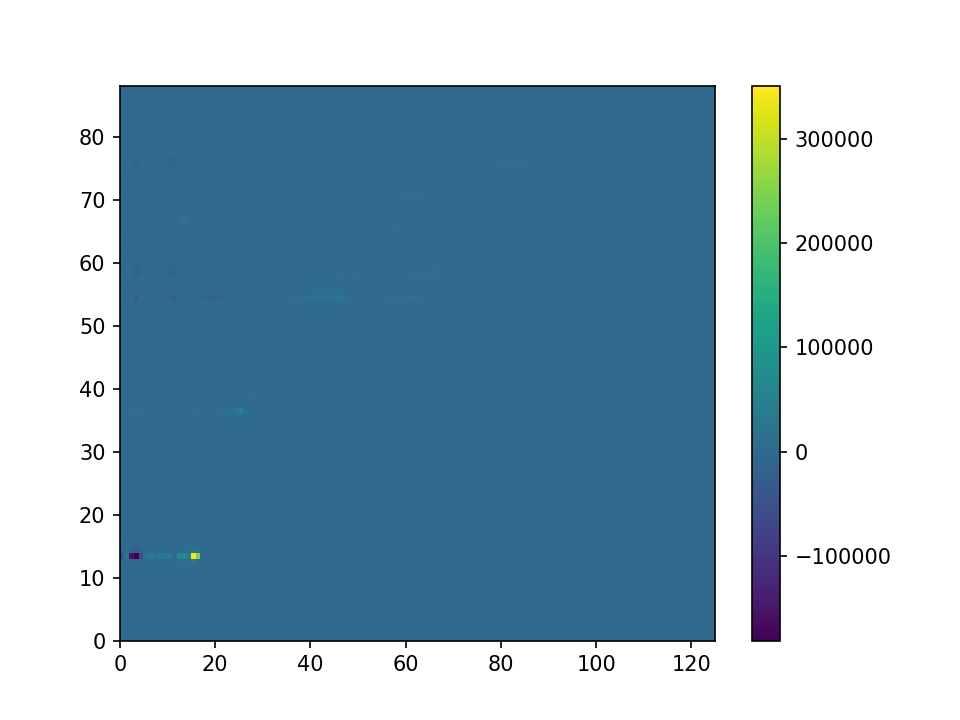

  fig, ax = plt.subplots() if ax is None else (None, ax)



<IPython.core.display.Javascript object>


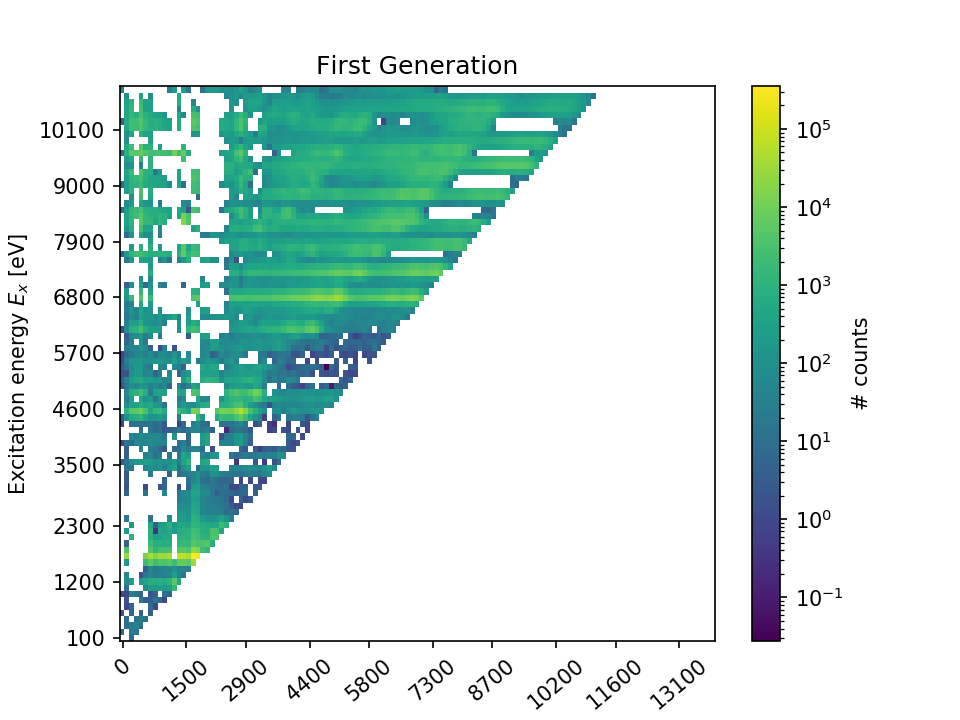

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d0627a10>)

In [9]:
firstgen2 = om.first_generation_method(simat, Ex_max=11_000, dE_gamma=0, multiplicity_estimation='total',
                                      N_iterations=10)
firstgen2.plot()

<IPython.core.display.Javascript object>


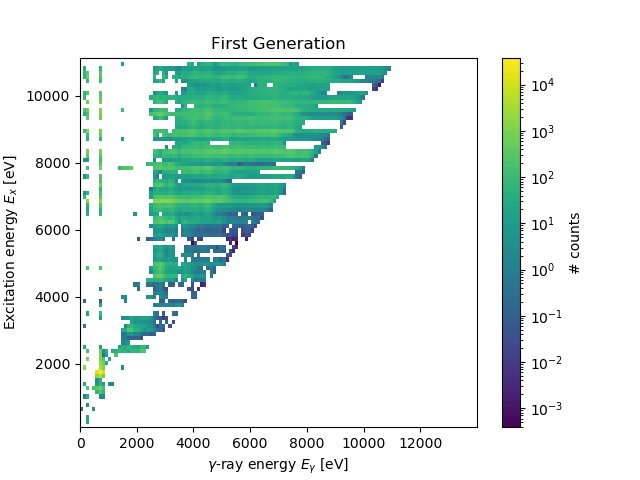

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f5936080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f5936080>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f59679e8>,
 <Figure size 640x480 with 2 Axes>)

In [124]:
(firstgen2 - mat).plot(scale='log')

# Rebinning a matrix

<IPython.core.display.Javascript object>


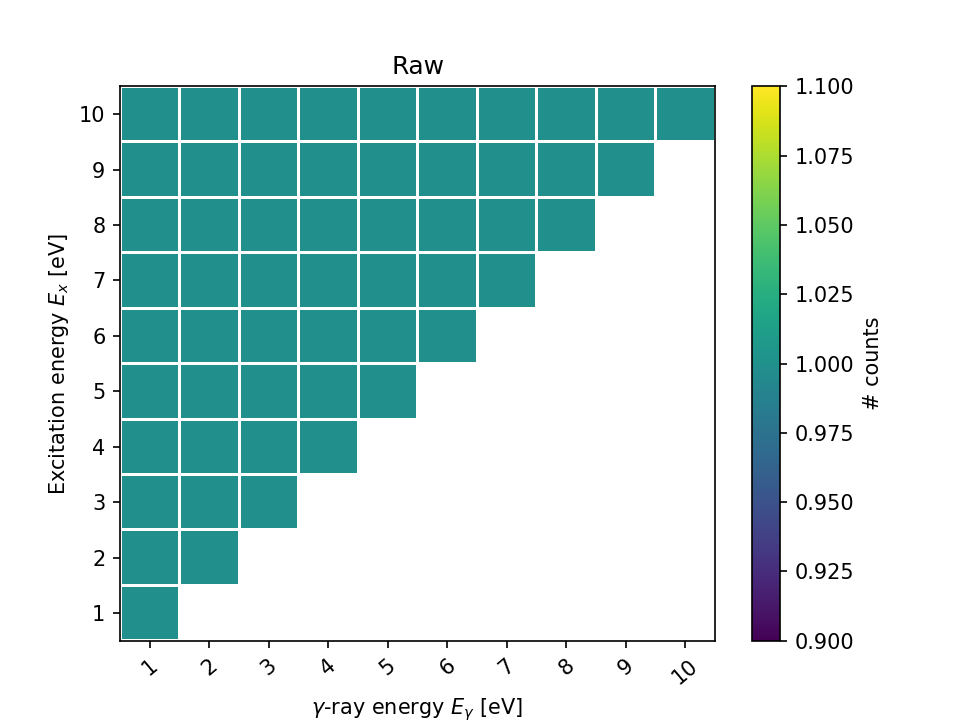

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6cbdf3810>)

In [11]:
N = 10
#values = np.triu(np.random.randint(0, 10, size=(N, N))).T
values = np.triu(np.ones((N, N))).T
X = np.arange(1, N+1)
#X = np.arange(0, N)
#X = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
mattis = om.Matrix(Ex=X, Eg=X, values=values)
mattis.plot(scale='linear', edgecolors='white')

<IPython.core.display.Javascript object>


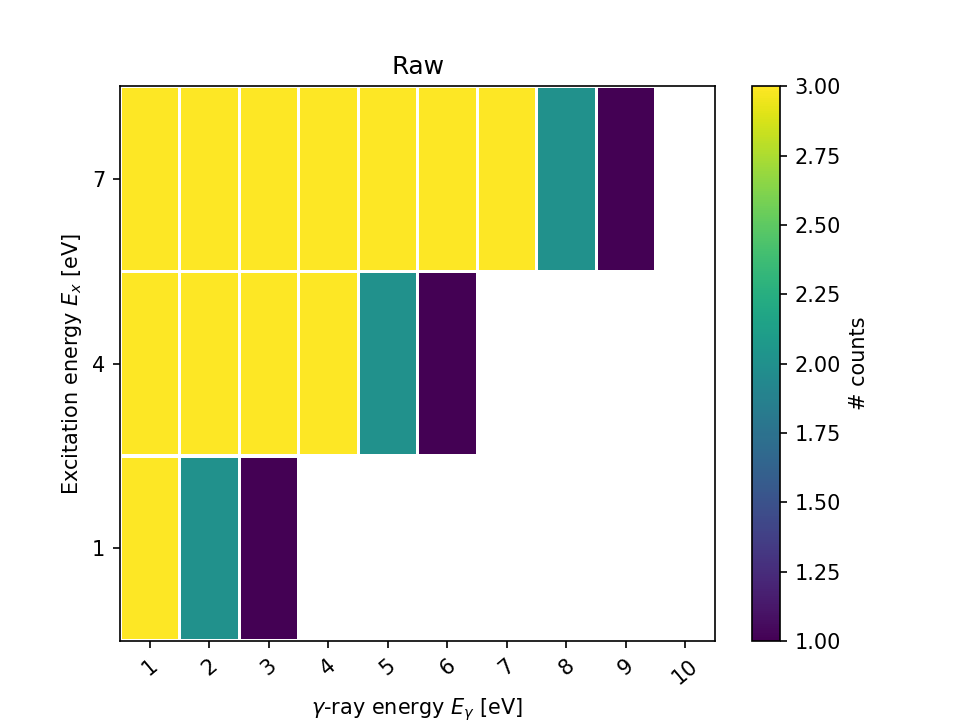

<IPython.core.display.Javascript object>


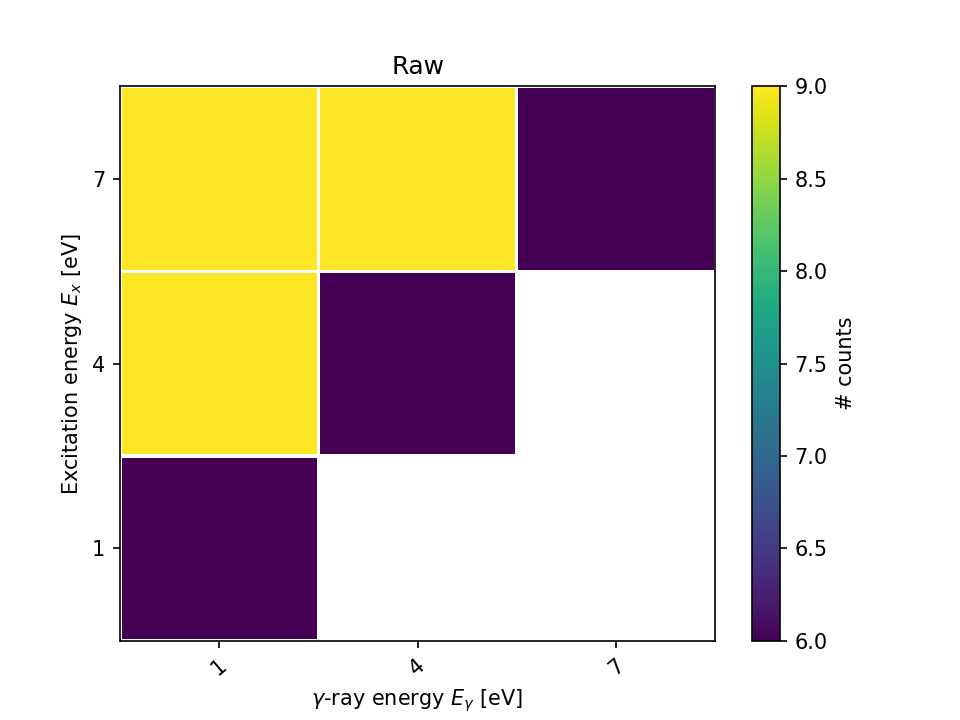

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6cba89290>)

In [12]:
mattis.rebin('Ex', factor=3)
mattis.plot(scale='linear', edgecolor='white')
mattis.rebin('Eg', factor=3)
mattis.plot(scale='linear', edgecolor='white')

  fig, ax = plt.subplots(1)



H.shape (20, 20)
A H slice: []
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.25       0.25       0.25       0.25       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.2        0.2        0.2        0.2        0.2        0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

<IPython.core.display.Javascript object>


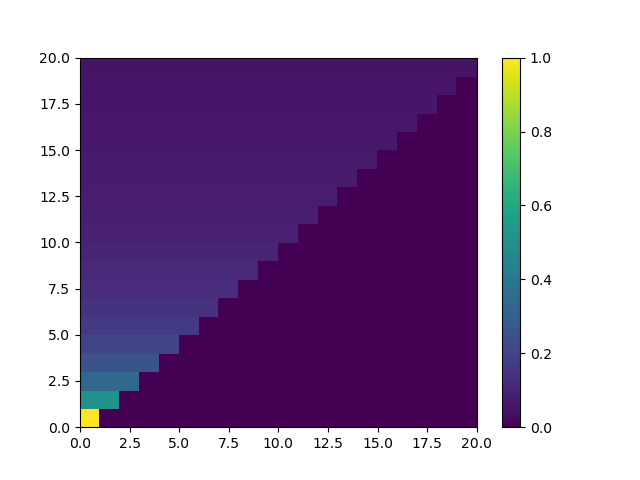

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f24bc0b8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f24bc0b8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  print("H_comp slice: ", H_compressed[31:33,:15])



<IPython.core.display.Javascript object>


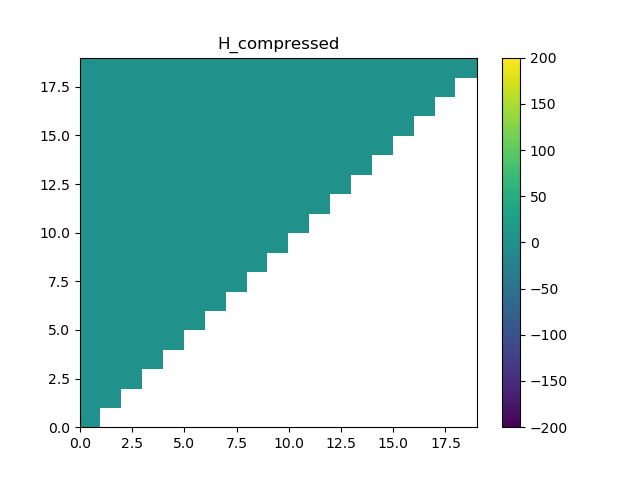

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f2542dd8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f2542dd8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  lines = ax.pcolormesh(Ex_array, Ex_array, W,  norm=LogNorm(vmin=1e-3, vmax=1e5))



H_comp slice:  []


<IPython.core.display.Javascript object>


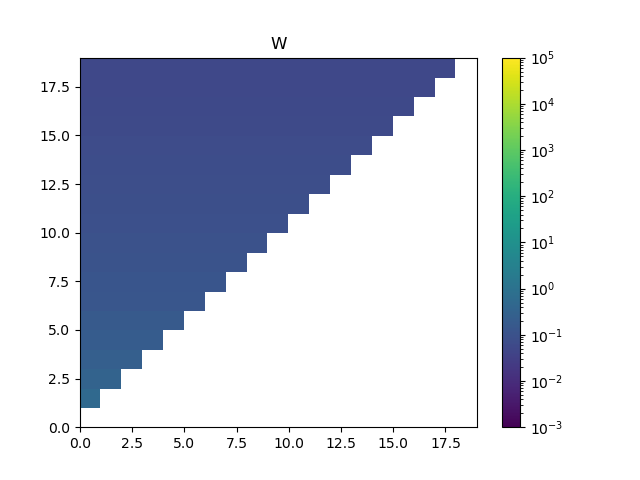

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f2470a58>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7fe8f2470a58>
DEBUG:matplotlib.colorbar:Setting pcolormesh
  print("W_final slice: ", W[31:33,:15])



<IPython.core.display.Javascript object>


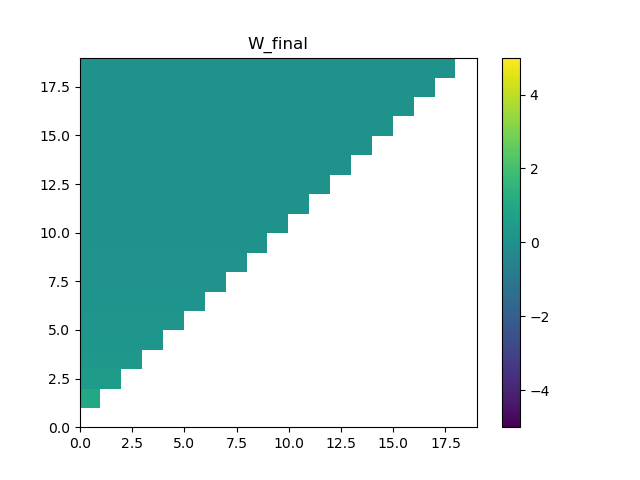

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f235b748>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f235b748>
DEBUG:matplotlib.colorbar:Setting pcolormesh


W_final slice:  []


<IPython.core.display.Javascript object>


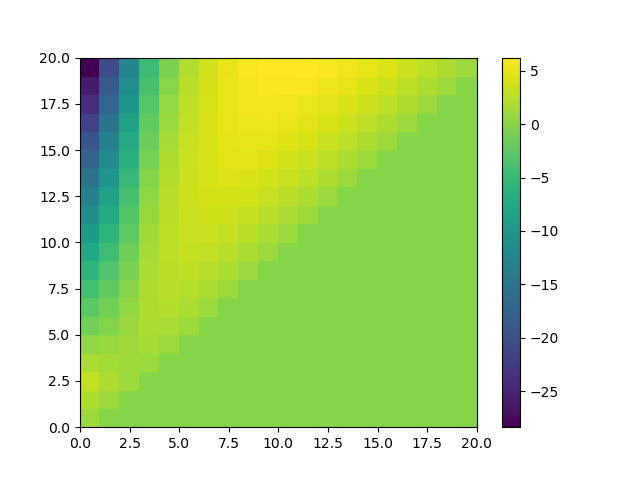

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f220d4a8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f220d4a8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


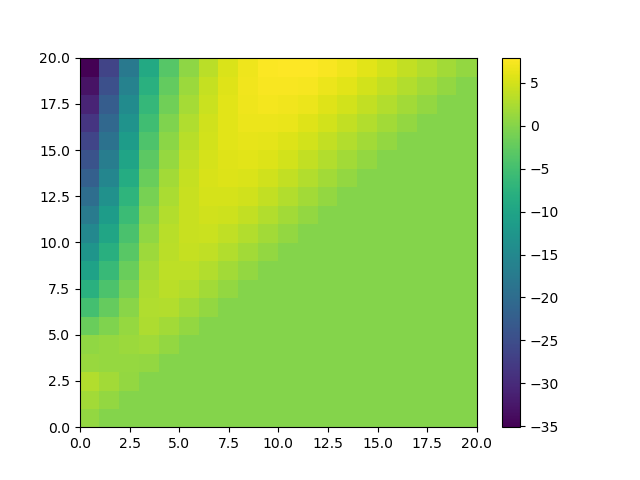

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f21900b8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f21900b8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


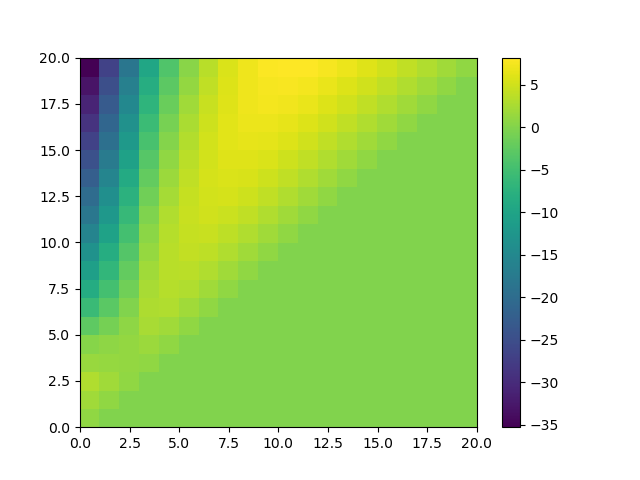

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f20b8940>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f20b8940>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


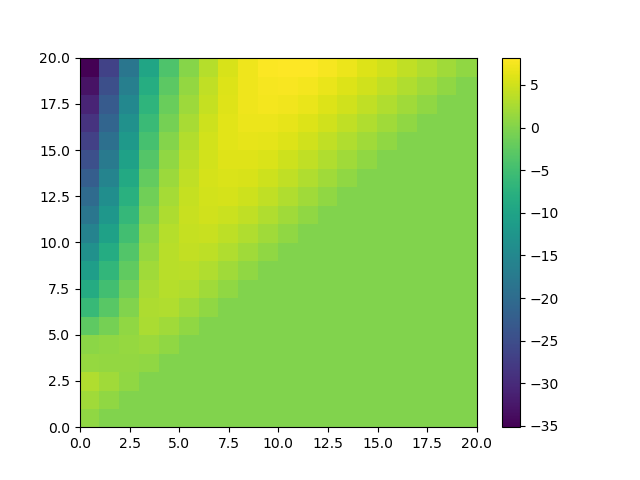

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff7438>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff7438>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


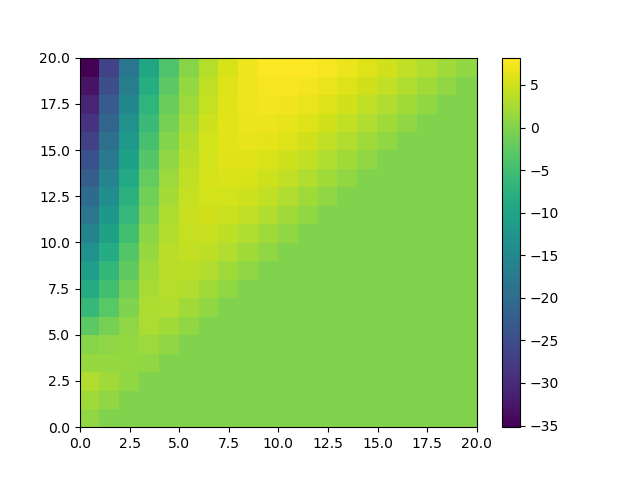

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff3240>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1ff3240>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


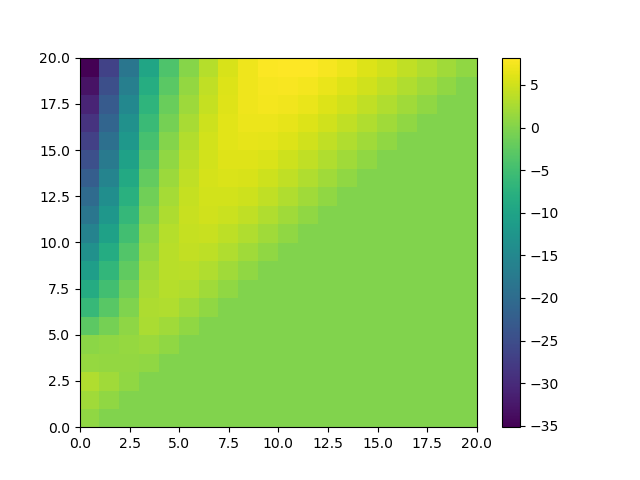

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1f61c88>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1f61c88>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


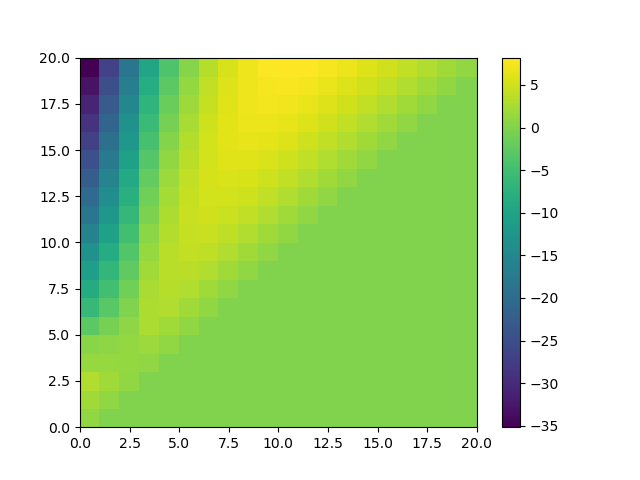

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1edd8d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1edd8d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


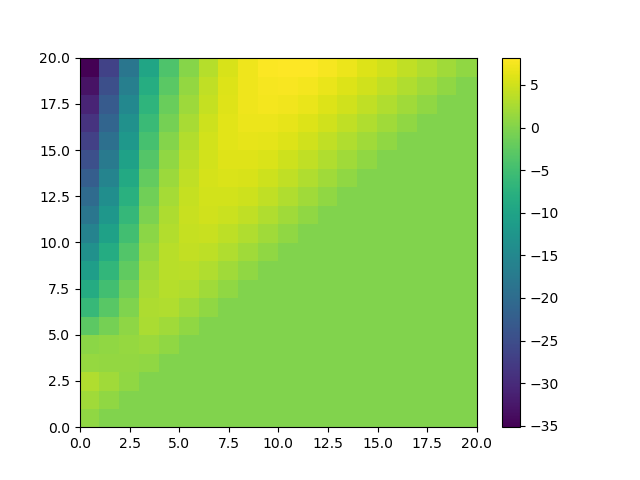

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1e576d8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1e576d8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


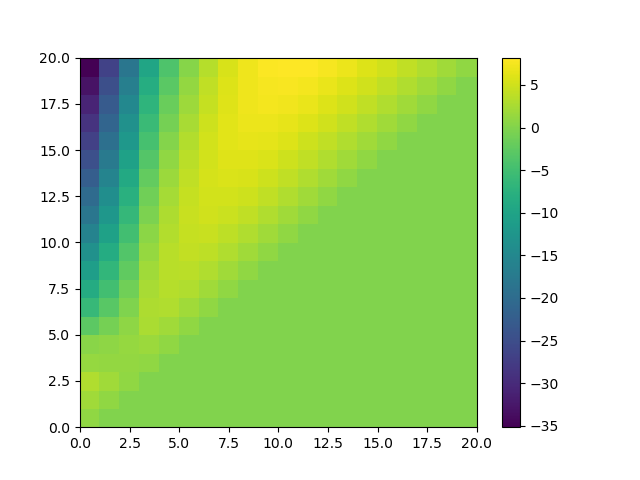

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1dda0f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1dda0f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


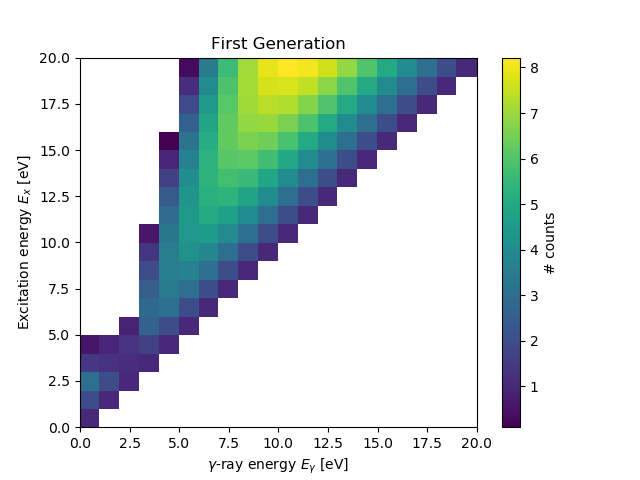

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1d43c18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f1d43c18>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f1d912b0>,
 <Figure size 640x480 with 2 Axes>)

In [146]:
firstgen = om.first_generation_method(allg, Ex_max=11_000, dE_gamma=0, multiplicity_estimation='total',
                                      N_iterations=10)
firstgen.plot()

<IPython.core.display.Javascript object>


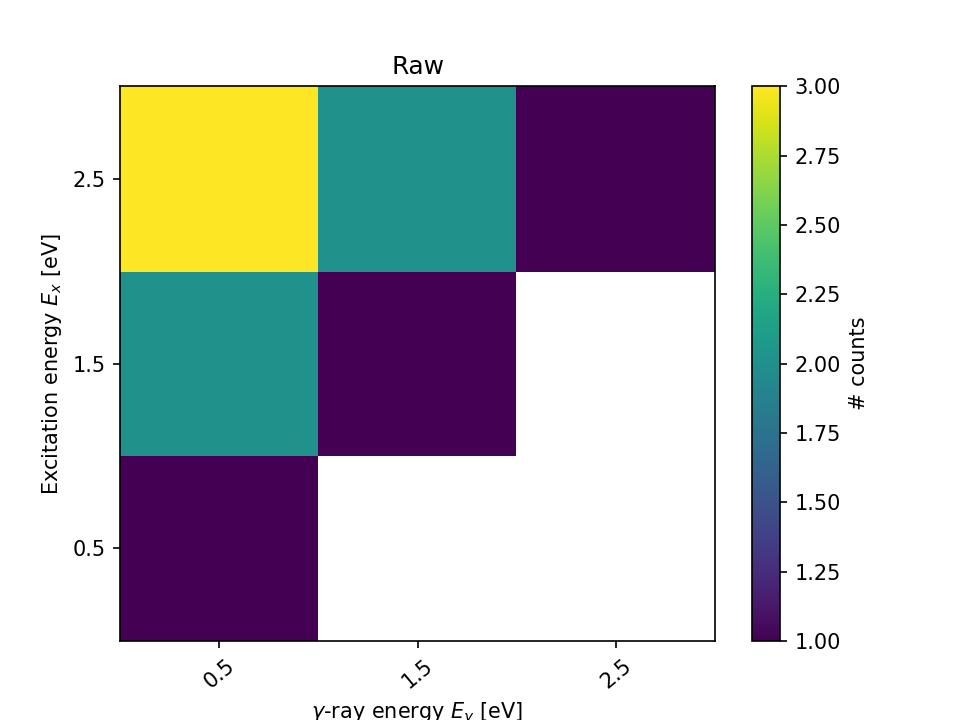

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170d3ef50>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170d3ef50>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:ompy.firstgeneration:Multiplicites:
┌─────┬────────────────┐
│ Ex  │ Multiplicities │
╞═════╪════════════════╡
│ 0.5 │ 1.0            │
├─────┼────────────────┤
│ 1.5 │ 1.8            │
├─────┼────────────────┤
│ 2.5 │ 2.14           │
└─────┴────────────────┘


<IPython.core.display.Javascript object>


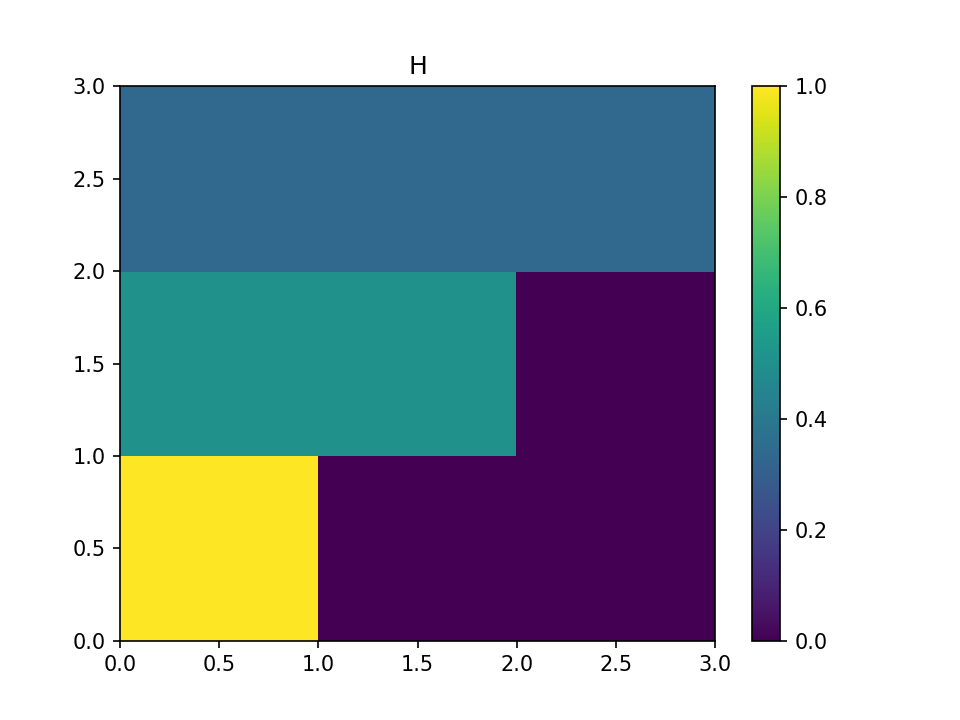

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170962a10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170962a10>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


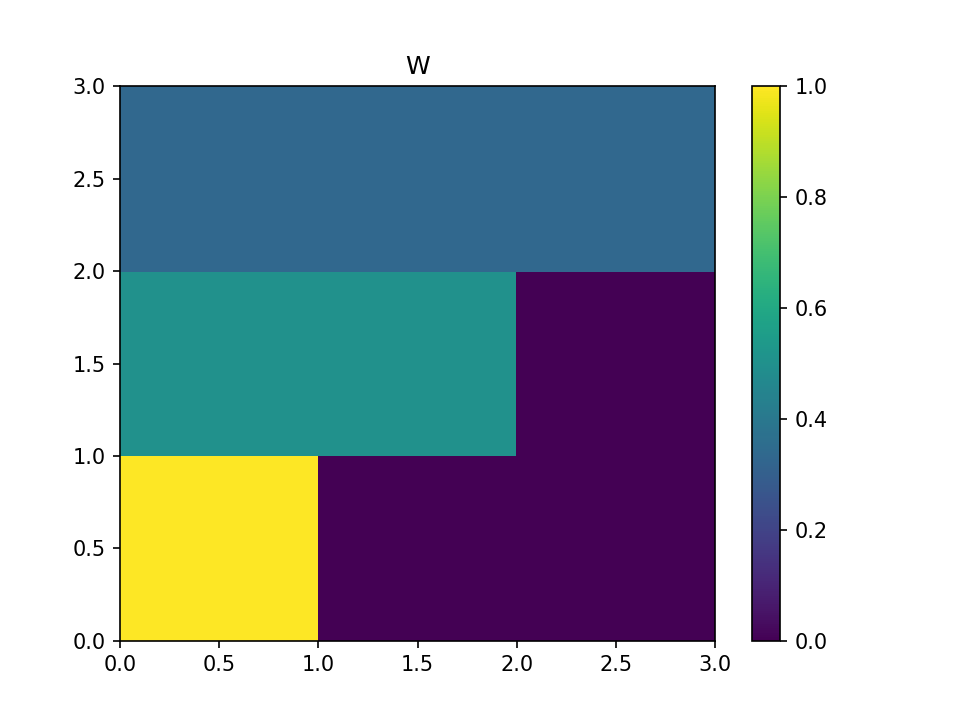

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0171b1d610>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0171b1d610>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


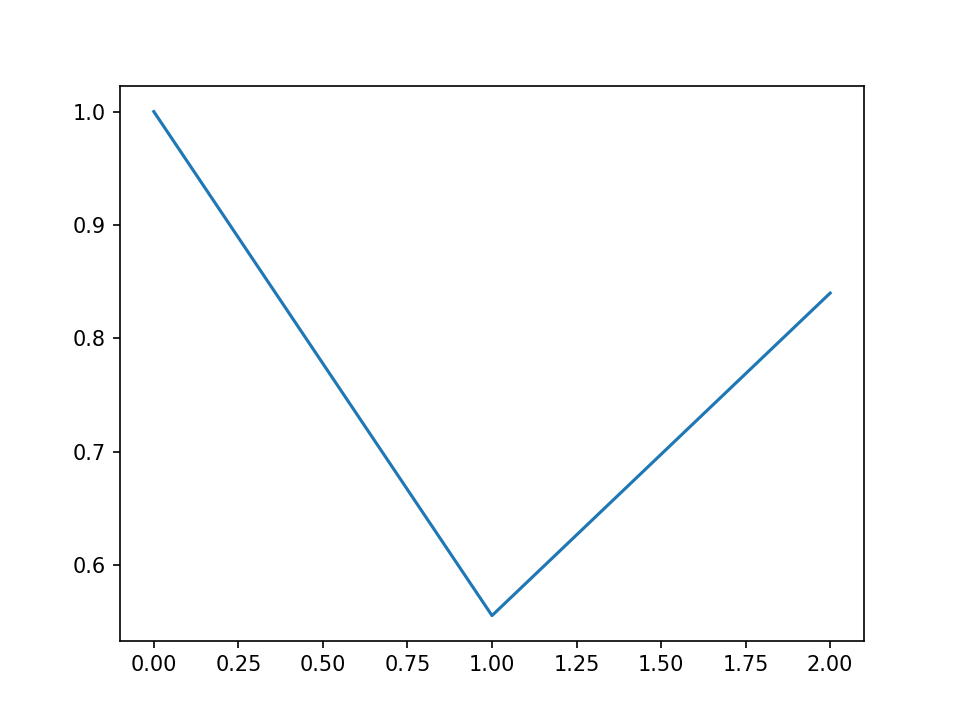

<IPython.core.display.Javascript object>


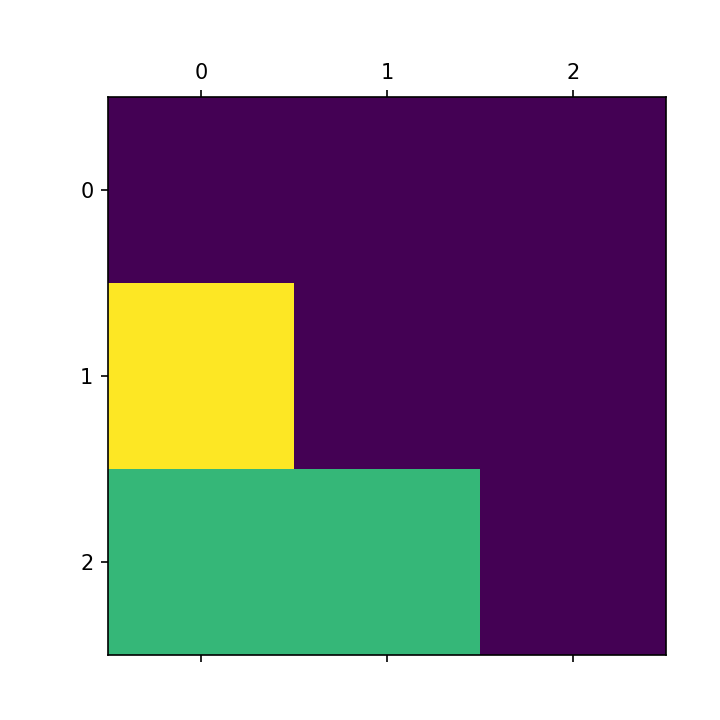

<IPython.core.display.Javascript object>


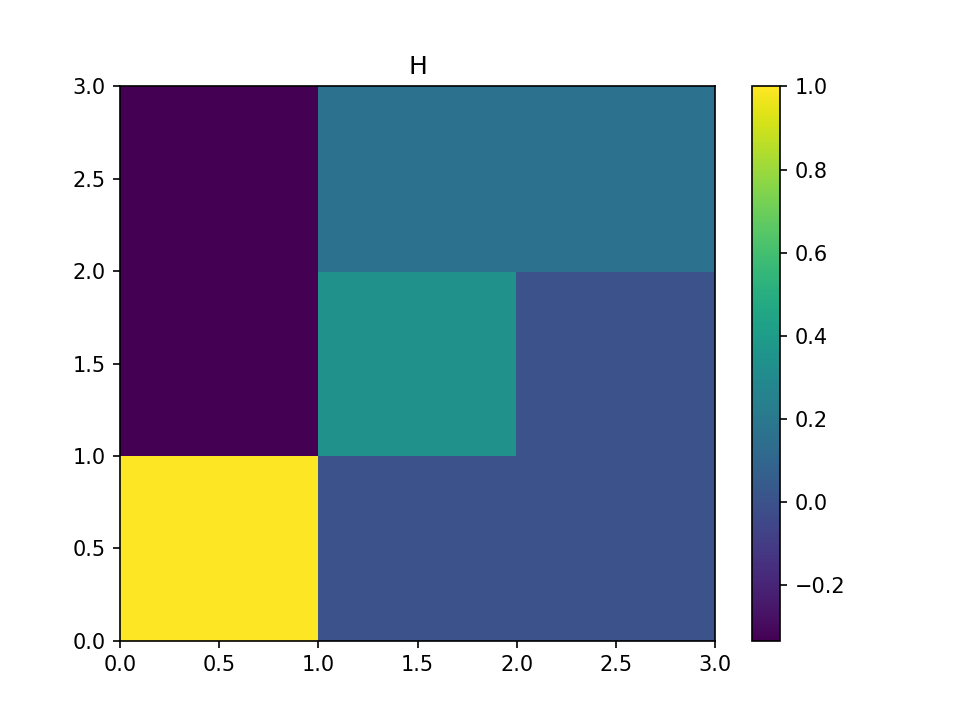

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f01705bd390>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f01705bd390>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


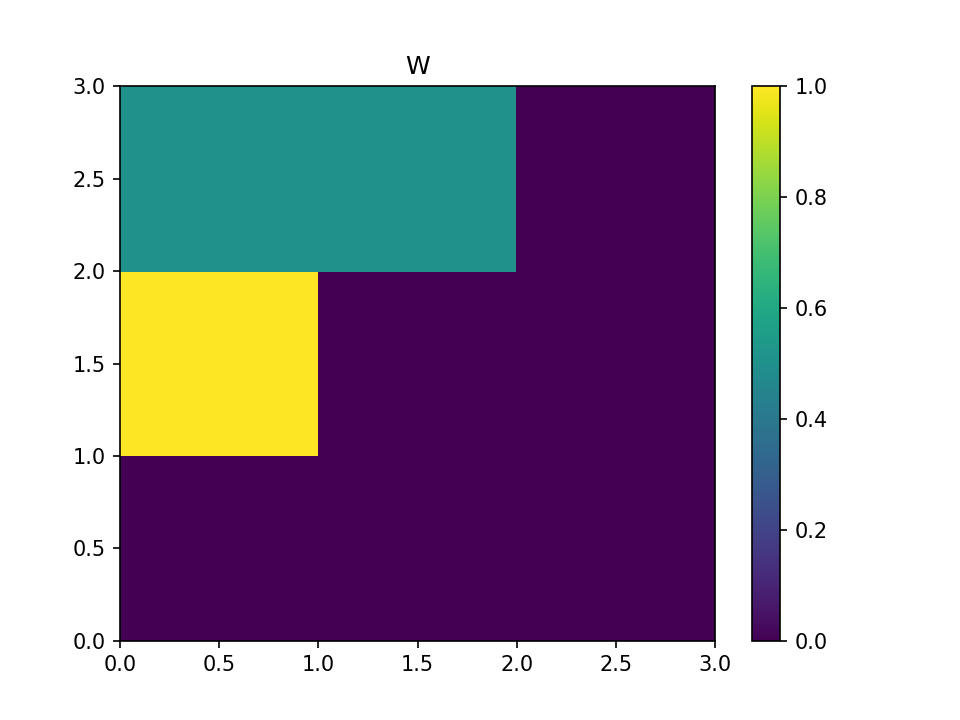

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f01705c8b10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f01705c8b10>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 1/2: ε = 0.833333


<IPython.core.display.Javascript object>


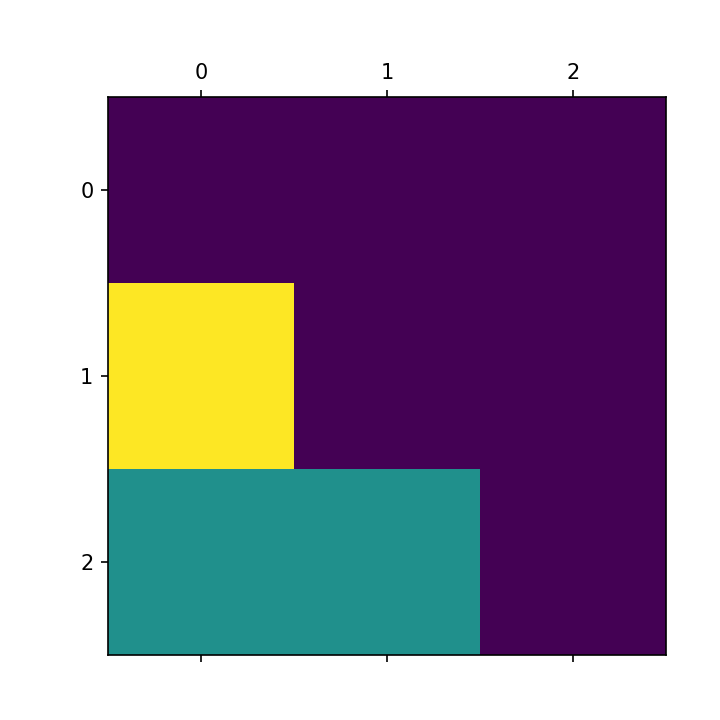

<IPython.core.display.Javascript object>


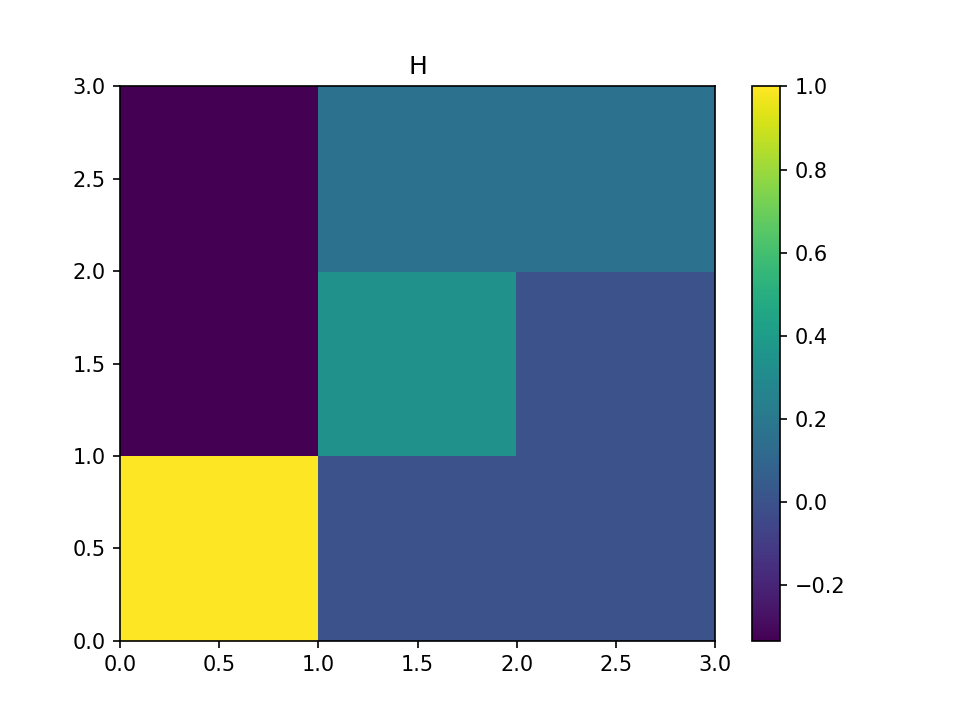

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f017045f8d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f017045f8d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


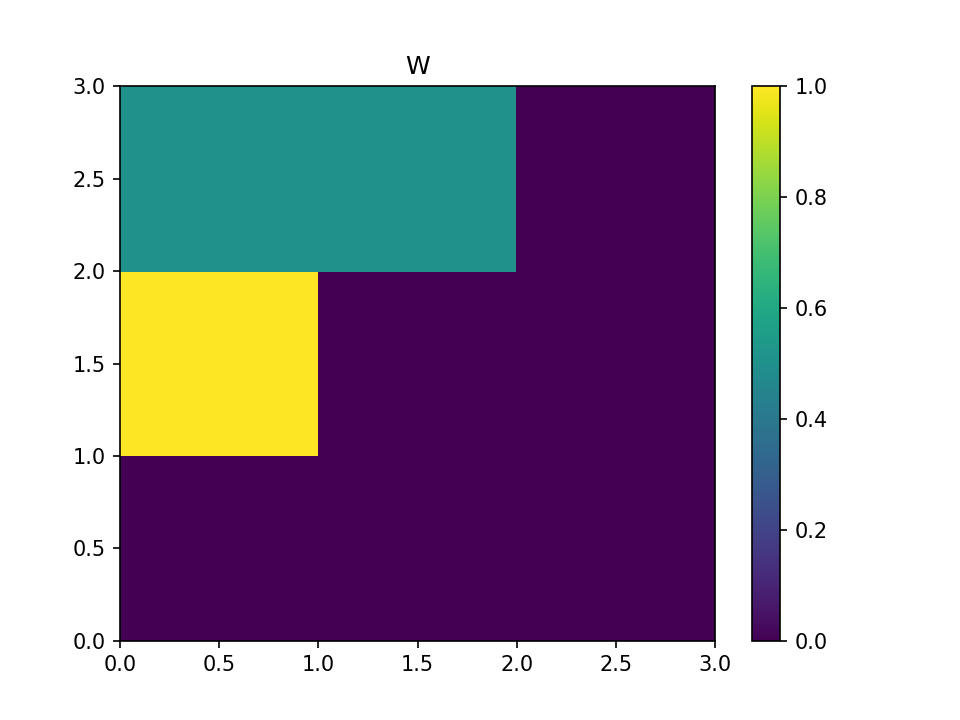

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0171231f10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0171231f10>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 2/2: ε = 0


<IPython.core.display.Javascript object>


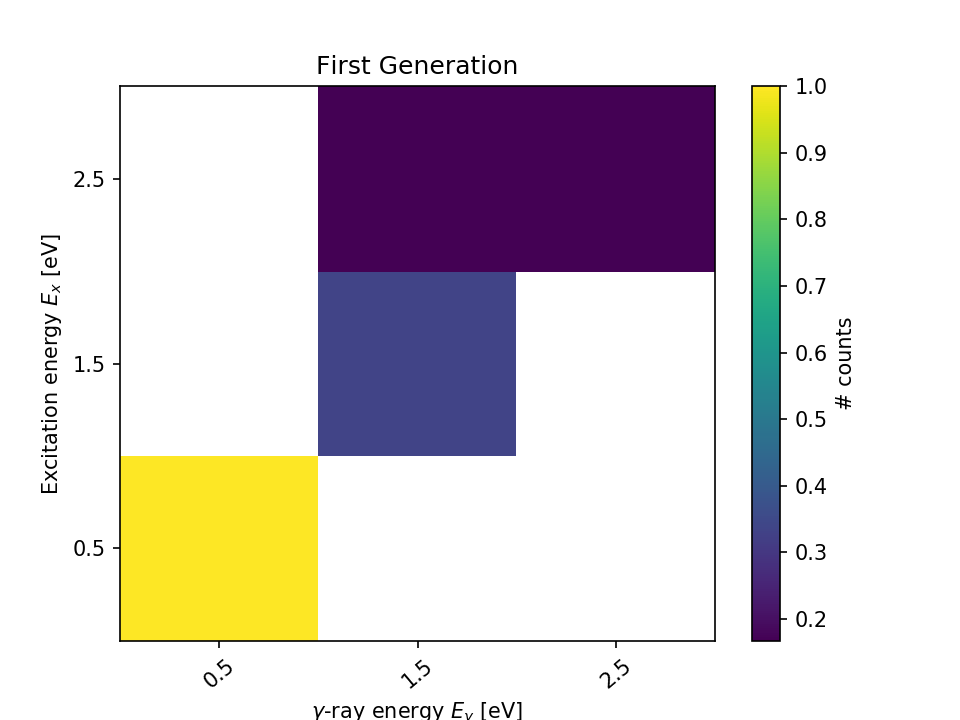

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170aff9d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f0170aff9d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7f01722bab90>,
 <Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0172474b50>)

In [62]:
#import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("ompy.firstgen")
logger.setLevel(logging.DEBUG)

allg, fg = om.all_generations_trivial((3, 3), ret_firstgen=True)
#allg.Ex = np.linspace(0, 3*1000, 3)
#allg.Eg = np.linspace(0, 3000, 3)
allg.plot()
Fg = om.FirstGeneration()
Fg.multiplicity_estimation = 'total'
Fg.num_iterations = 2
Fg.step = om.plot_hook(Fg.step)
Fg.setup = om.plot_hook(Fg.setup)
fg_cand = Fg.apply(allg)
fg_cand.plot()
#om.annotate_heatmap(fg_cand.plot()[0], fg_cand)
#fg_cand.values
#fg_cand.ascii_plot()
#allg.Ex

<IPython.core.display.Javascript object>


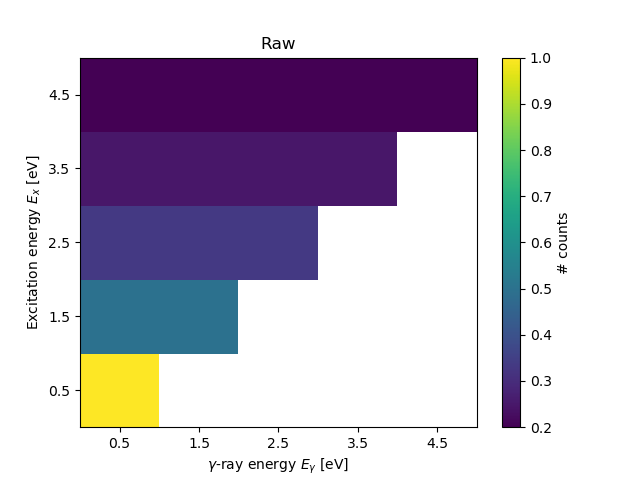

array([0.5, 0.5, 0. , 0. , 0. ])

In [100]:
firstgen = om.FirstGeneration()
mat = om.all_generations_trivial((5, 5))
rownorm = firstgen.row_normalized(mat)
om.Matrix(values=firstgen.row_normalized(mat)).plot()
rownorm[1, :]

DEBUG:ompy.firstgeneration:Multiplicites:
┌────────┬────────────────┐
│ Ex     │ Multiplicities │
╞════════╪════════════════╡
│ 500.0  │ 1.0            │
├────────┼────────────────┤
│ 1500.0 │ 1.5            │
├────────┼────────────────┤
│ 2500.0 │ 1.8            │
└────────┴────────────────┘


<IPython.core.display.Javascript object>


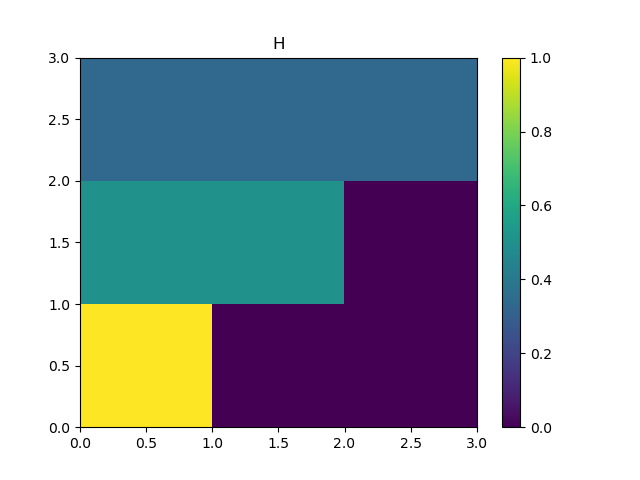

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f53b8a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f53b8a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


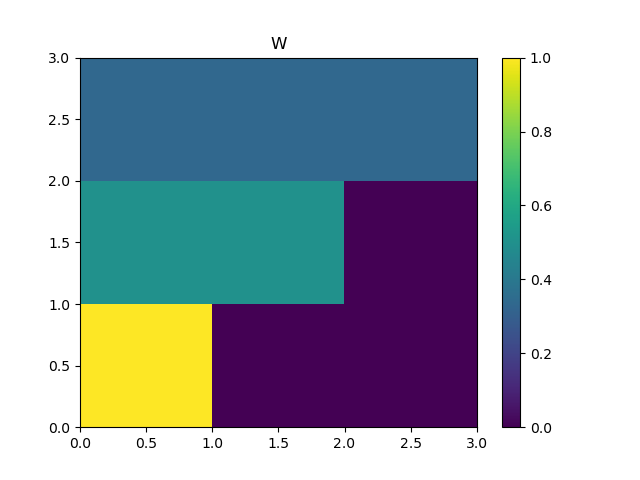

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4dcec18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4dcec18>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


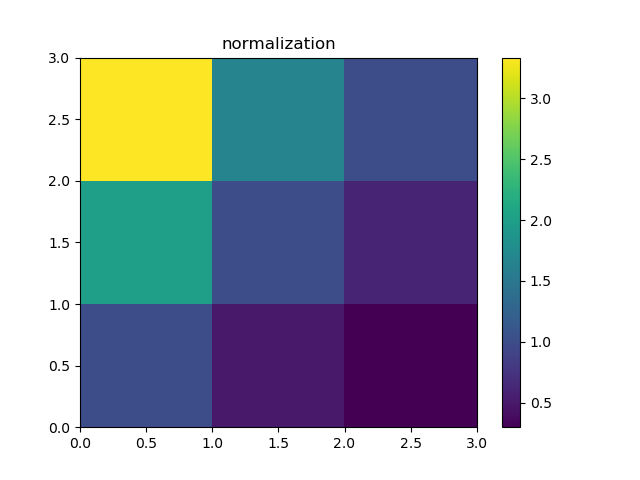

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f77c0a58>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f77c0a58>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


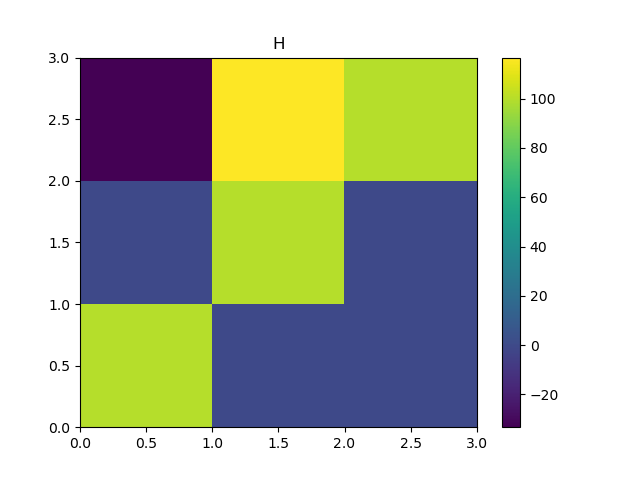

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7347400>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f7347400>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


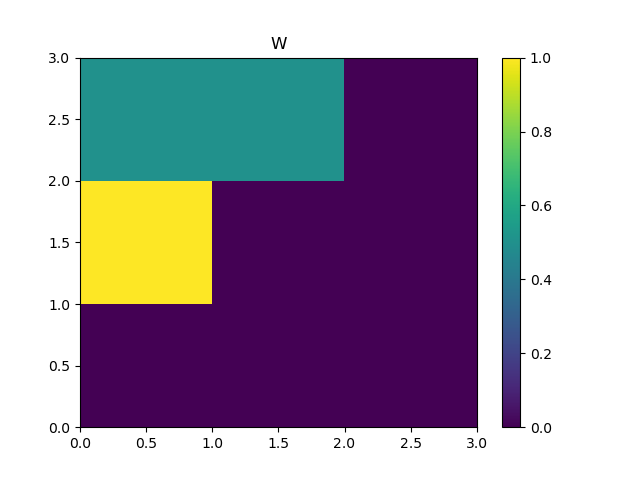

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55acb38>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55acb38>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 1/6: ε = 116.333


<IPython.core.display.Javascript object>


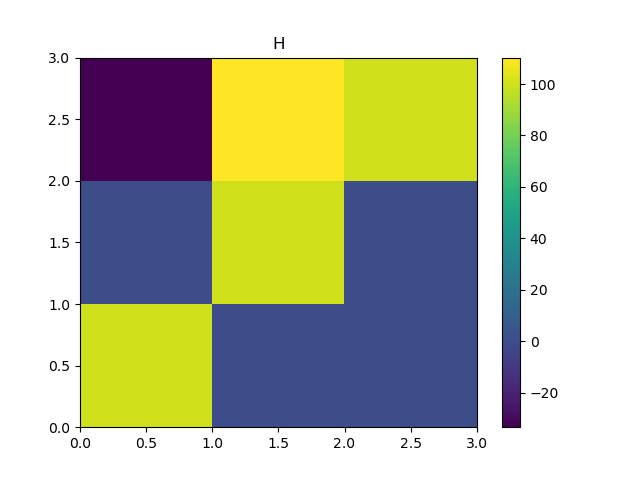

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5091da0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5091da0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


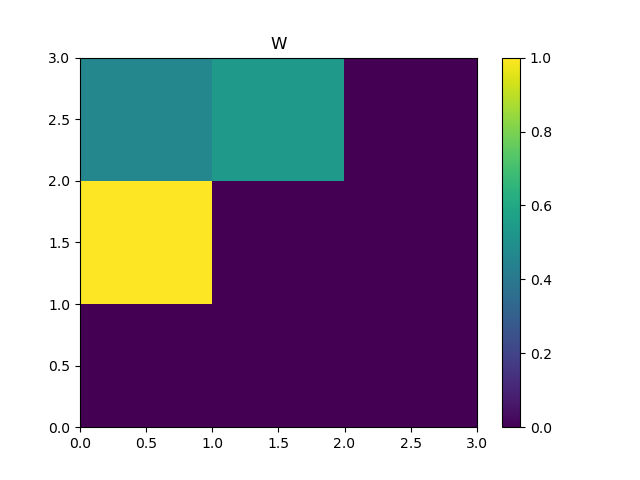

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f54d77f0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f54d77f0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 2/6: ε = 6.41026


<IPython.core.display.Javascript object>


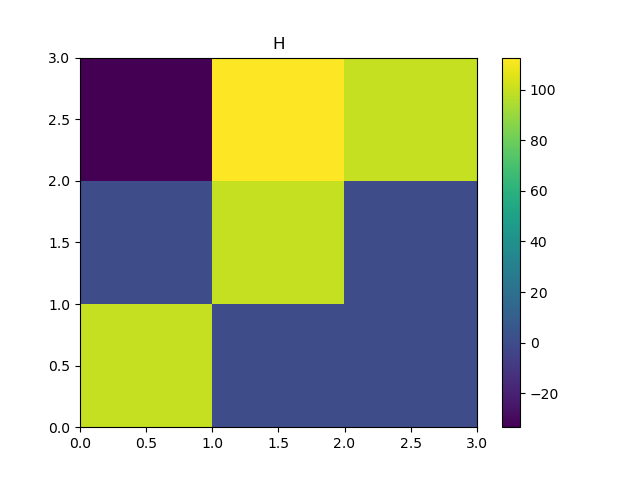

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4f33f28>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4f33f28>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


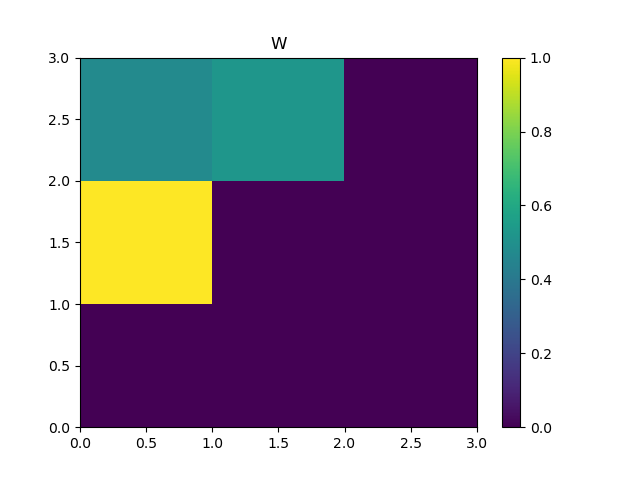

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5545128>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5545128>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 3/6: ε = 2.34522


<IPython.core.display.Javascript object>


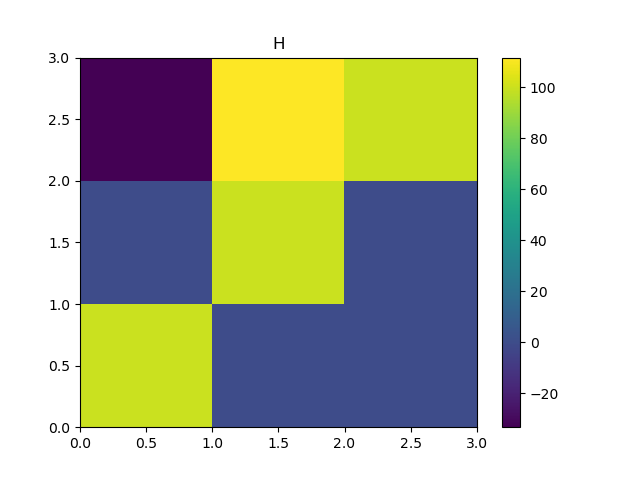

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f568ddd8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f568ddd8>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


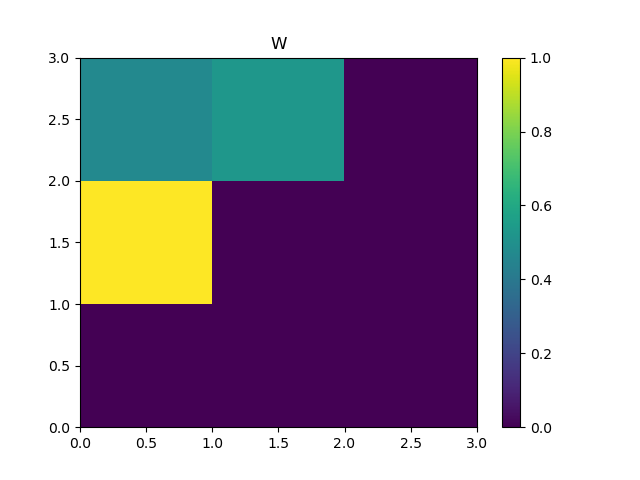

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55f19b0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f55f19b0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 4/6: ε = 0.874411


<IPython.core.display.Javascript object>


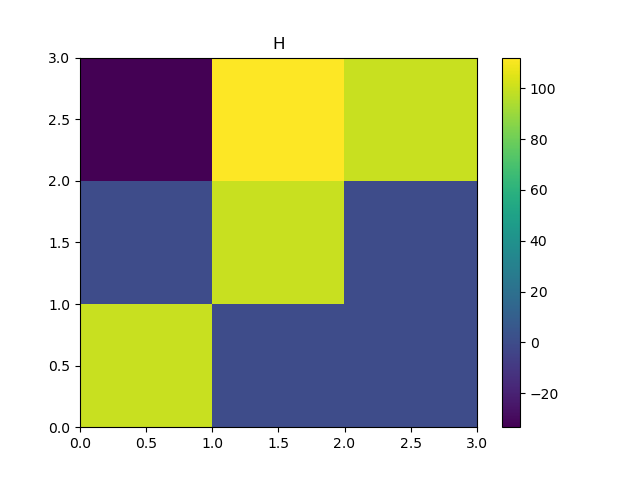

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f542f278>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f542f278>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


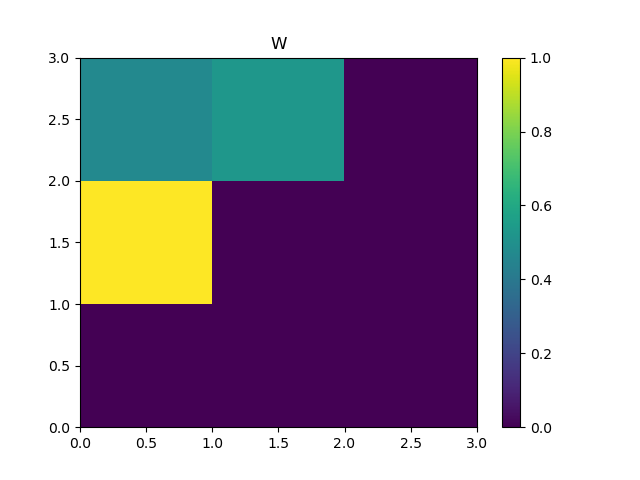

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5401c18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f5401c18>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 5/6: ε = 0.323759


<IPython.core.display.Javascript object>


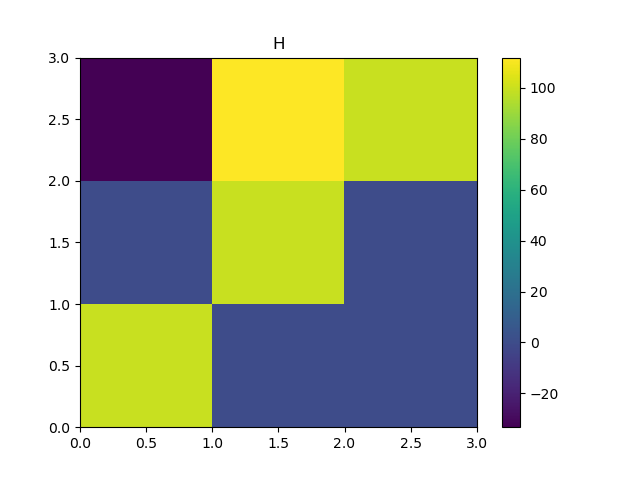

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a98b38>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a98b38>
DEBUG:matplotlib.colorbar:Setting pcolormesh


<IPython.core.display.Javascript object>


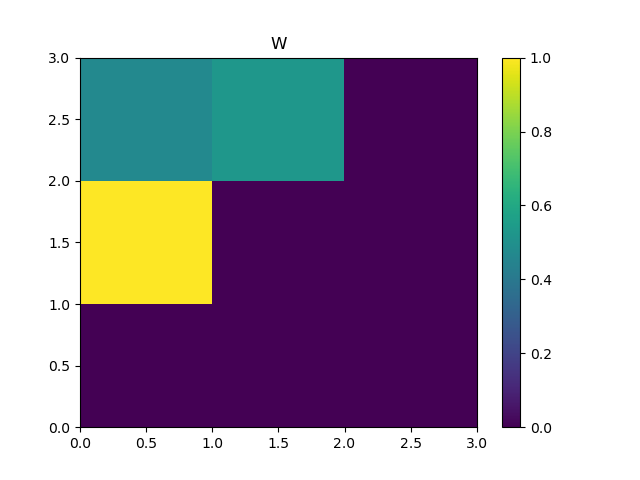

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a169e8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4a169e8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
INFO:ompy.firstgeneration:iter 6/6: ε = 0.119943


<IPython.core.display.Javascript object>


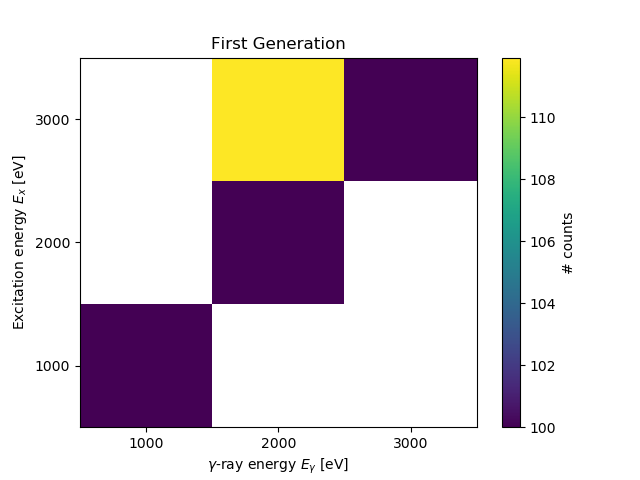

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4990a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8f4990a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh


(<matplotlib.collections.QuadMesh at 0x7fe8f49d6a58>,
 <Figure size 640x480 with 2 Axes>)

In [139]:
mat = om.Matrix(filename='m.m')
Fg.step = om.plot_hook(Fg.step)
Fg.apply(mat).plot()

<IPython.core.display.Javascript object>


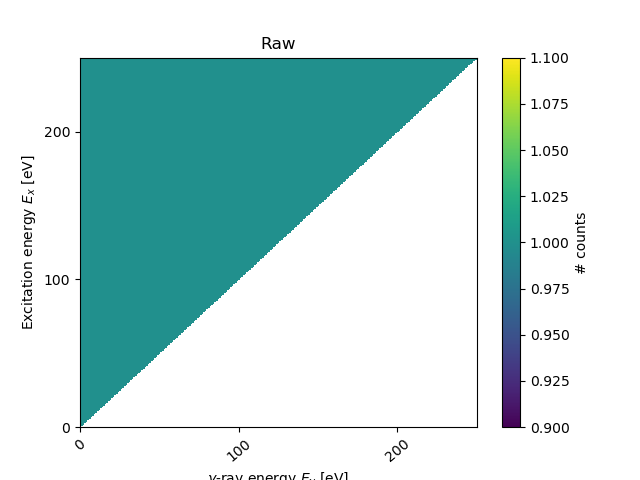

(<matplotlib.collections.QuadMesh at 0x7facf503b278>,
 <Figure size 640x480 with 2 Axes>)

In [50]:
mat = om.ones((250, 250))
#mat.Eg = np.linspace(-2, 2, 5)
mat.plot(scale='linear')
#mat.cut('Eg', Emin=0.2, Emax=0.2)
#print(mat.Eg)
#mat.plot(edgecolor='white')

<IPython.core.display.Javascript object>


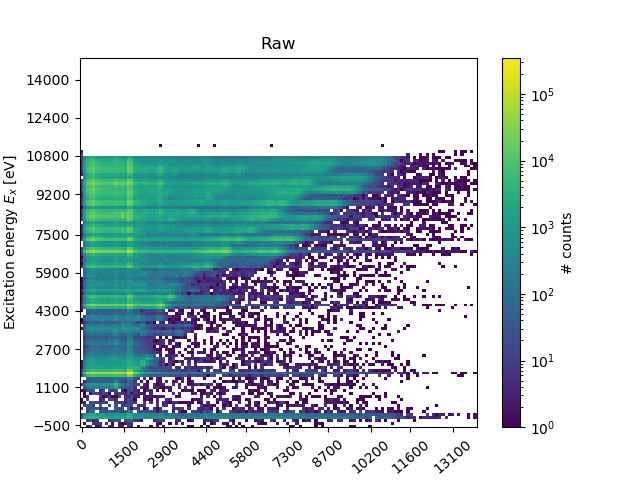

(<matplotlib.collections.QuadMesh at 0x7facf5e19b38>,
 <Figure size 640x480 with 2 Axes>)

In [46]:
simat = om.load_example_raw('Si28')
simat.plot()